Anggota Kelompok:
1. DIAH ANGGRAINI (24083010051)
2. ANGELINA NIRMALA PUTERI DIKA PRAKTIKO (24083010055)
3. GENDIS POERBODANI (24083010077)

#DATA UNDERSTANDING

In [ ]:
import pandas as pd
df = pd.read_csv("preferensi_maknana_kantin_upn.csv", encoding='latin1')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
print(f"Jumlah baris: {df.shape[0]}, Jumlah kolom: {df.shape[1]}")

Jumlah baris: 86, Jumlah kolom: 8


In [ ]:
df.head()

,Program Studi,Gender,Apa tipe makanan yang sering kamu beli?,Jenis Makanan,Rasa favorit kamu apa?,Jenis Makanan,Rasa favorit kamu apa?.1,Rentang harga makanan kamu berapa nih?
0,ð¼ Bisnis Digital,ð§ Laki-laki,ð Makanan berat,ð± Ayam katsu,ð­ Manis,NaN,NaN,ðµ Rp 10.001 â Rp 15.000
1,ð¼ Bisnis Digital,ð© Perempuan,ð Makanan ringan,NaN,ð Gurih/asin,NaN,NaN,ðµ Rp 15.001 â Rp 20.000
2,ð¼ Bisnis Digital,ð© Perempuan,ð Makanan berat,ð³ Nasi goreng,ð¶ï¸ Pedas,NaN,NaN,ðµ Rp 15.001 â Rp 20.000
3,ð¼ Bisnis Digital,ð© Perempuan,ð Makanan berat,ð¥¡ Rice bowl,NaN,ð¥ Siomay,ð­ Manis,ðµ Rp 5.000 â Rp 10.000
4,ð¼ Bisnis Digital,ð© Perempuan,ð Makanan ringan,NaN,NaN,ð Molen,ð­ Manis,ðµ Rp 15.001 â Rp 20.000


Data Kuesioner terdiri dari 8 kolom yang terdiri dari 'Program Studi, Gender, Tipe Makanan yang Sering Dibeli, Jenis makanan, Rasa Favorit, Jenis Makanan, Rasa Favorit, Rentang Harga Makanan'.

Terdapat kolom duplikat pada kolom 'Jenis Makanan' dan 'Rasa Favorit' yang muncul dua kali. Namun, kedua kolom ini bukan duplikasi hasil eror, melainkan fungsi yang berbeda tergantung konteksnya.

Kolom 'Jenis Makanan' pertama ditujukan untuk makanan berjenis berat, sedangkan kolom kedua ditujukan untuk makanan berjenis ringan. Begitupun dengan kolom 'Rasa Favorit' pertama berisi catatan rasa favorit unntuk mjenis maknaan berat dan kolom kedua 'Rasa Favorit' berisi catatan untuk makanan berjenis ringan.

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 8 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Program Studi                            86 non-null     object
 1   Gender                                   86 non-null     object
 2   Apa tipe makanan yang sering kamu beli?  86 non-null     object
 3     Jenis Makanan                          51 non-null     object
 4   Rasa favorit kamu apa?                   51 non-null     object
 5   Jenis Makanan                            35 non-null     object
 6   Rasa favorit kamu apa?.1                 35 non-null     object
 7   Rentang harga makanan kamu berapa nih?   86 non-null     object
dtypes: object(8)
memory usage: 5.5+ KB


In [ ]:
import pandas as pd
import re

# ubah path sesuai file di Colab (sudah ada di session kamu)
input_path = 'preferensi_maknana_kantin_upn.csv'
output_path = 'Preferensi_Makanan_Kantin_UPN_clean.csv'

# load data
df = pd.read_csv(input_path)

# fungsi untuk menghapus emoji — parameter dinamai 'teks' agar sesuai bahasa
def remove_emoji(teks):
    if pd.isna(teks):
        return teks
    if not isinstance(teks, str):
        teks = str(teks)
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # flags
        "\U00002700-\U000027BF"  # dingbats
        "\U0001F900-\U0001F9FF"  # supplemental symbols
        "\U00002600-\U000026FF"  # misc symbols
        "]+",
        flags=re.UNICODE
    )
    return emoji_pattern.sub(r'', teks)

# Terapkan pembersihan hanya pada kolom teks (object / string)
for col in df.columns:
    if df[col].dtype == "object" or df[col].dtype == "string":
        # gunakan .apply(remove_emoji) supaya nama parameter 'teks' dipakai dengan benar
        df[col] = df[col].str.replace(r'[^\w\s]', '', regex=True)
        df[col] = df[col].str.strip()  # hapus spasi awal/akhir
        df[col] = df[col].str.replace(r'\s+', ' ', regex=True)  # gabungkan spasi berlebih

df = df.rename(columns={
    "Program Studi": "ProgramStudi",
    "Gender": "Gender",
    "Apa tipe makanan yang sering kamu beli?": "TipeMakanan",
    "  Jenis Makanan": "JenisMakanan1",
    "Rasa favorit kamu apa?": "Rasa1",
    "Jenis Makanan": "JenisMakanan2",
    "Rasa favorit kamu apa?.1": "Rasa2",
    "Rentang harga makanan kamu berapa nih?": "Harga"
})

# Simpan file bersih
df.to_csv(output_path, index=False)

In [ ]:
df.head()

,ProgramStudi,Gender,TipeMakanan,JenisMakanan1,Rasa1,JenisMakanan2,Rasa2,Harga
0,Bisnis Digital,Lakilaki,Makanan berat,Ayam katsu,Manis,NaN,NaN,Rp 10001 Rp 15000
1,Bisnis Digital,Perempuan,Makanan ringan,NaN,Gurihasin,NaN,NaN,Rp 15001 Rp 20000
2,Bisnis Digital,Perempuan,Makanan berat,Nasi goreng,Pedas,NaN,NaN,Rp 15001 Rp 20000
3,Bisnis Digital,Perempuan,Makanan berat,Rice bowl,NaN,Siomay,Manis,Rp 5000 Rp 10000
4,Bisnis Digital,Perempuan,Makanan ringan,NaN,NaN,Molen,Manis,Rp 15001 Rp 20000


In [ ]:
display(df.describe())

#HIMPUNAN

In [ ]:
import pandas as pd
import numpy as np
from itertools import combinations

# ============================================
# STEP 1: BACA & BERSIHKAN DATA
# ============================================

df = pd.read_csv("Preferensi_Makanan_Kantin_UPN_clean.csv", encoding='latin1')

# Bersihkan nama kolom
df.columns = df.columns.str.replace(r'[^\w\s]', '', regex=True)
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(r'\s+', ' ', regex=True)

print("=" * 80)
print("PEMBERSIHAN DATA & IDENTIFIKASI KOLOM")
print("=" * 80)
print(f"Total responden: {len(df)}")
print(f"\nNama kolom setelah dibersihkan:")
for i, col in enumerate(df.columns):
    print(f"  {i}. {col}")

# ============================================
# IDENTIFIKASI INDEX KOLOM
# ============================================

print("\n" + "=" * 80)
print("IDENTIFIKASI KOLOM MAKANAN BERAT & RINGAN")
print("=" * 80)

# Cari index kolom yang mengandung kata kunci
idx_prodi = 0
idx_gender = 1
idx_tipe_makanan = 2

# Cari kolom jenis makanan (yang ada 1 dan 2 nya)
idx_jenis_berat = None
idx_jenis_ringan = None
idx_rasa_berat = None
idx_rasa_ringan = None

for i, col in enumerate(df.columns):
    col_lower = col.lower()
    if 'jenis' in col_lower and 'makanan' in col_lower:
        if '1' in col or idx_jenis_berat is None:
            idx_jenis_berat = i
            print(f"✅ Jenis Makanan Berat (kolom {i}): {col}")
        elif '2' in col:
            idx_jenis_ringan = i
            print(f"✅ Jenis Makanan Ringan (kolom {i}): {col}")

    if 'rasa' in col_lower:
        if '1' in col or idx_rasa_berat is None:
            idx_rasa_berat = i
            print(f"✅ Rasa Makanan Berat (kolom {i}): {col}")
        elif '2' in col:
            idx_rasa_ringan = i
            print(f"✅ Rasa Makanan Ringan (kolom {i}): {col}")

# Fallback jika tidak ditemukan
if idx_jenis_berat is None or idx_jenis_ringan is None:
    print("\n⚠️ Kolom tidak terdeteksi otomatis. Gunakan manual:")
    print("Sesuaikan index di bagian MANUAL OVERRIDE di bawah!")

# ============================================
# CLASS UNTUK ANALISIS BERAT VS RINGAN
# ============================================

class AnalisisMakananBeratRingan:
    """
    Class untuk analisis terpisah makanan berat dan ringan
    dengan 7 operasi himpunan + analisis popularitas
    """

    def __init__(self, df, idx_prodi, idx_gender, idx_tipe,
                 idx_jenis_berat, idx_jenis_ringan,
                 idx_rasa_berat, idx_rasa_ringan):
        self.df = df
        self.idx_prodi = idx_prodi
        self.idx_gender = idx_gender
        self.idx_tipe = idx_tipe
        self.idx_jenis_berat = idx_jenis_berat
        self.idx_jenis_ringan = idx_jenis_ringan
        self.idx_rasa_berat = idx_rasa_berat
        self.idx_rasa_ringan = idx_rasa_ringan

    def buat_himpunan(self, kolom):
        """Buat himpunan dari kolom"""
        if isinstance(kolom, int):
            kolom = self.df.columns[kolom]
        return set(self.df[kolom].dropna().unique())

    # ========== ANALISIS BARU: POPULARITAS MAKANAN ==========

    def analisis_popularitas_berat_ringan(self):
        """Analisis lengkap popularitas makanan berat vs ringan"""
        print("\n" + "=" * 80)
        print("📊 ANALISIS POPULARITAS: MAKANAN BERAT VS RINGAN")
        print("=" * 80)

        # 1. Hitung persentase responden yang pilih berat vs ringan
        col_tipe = self.df.columns[self.idx_tipe]
        total_responden = len(self.df)

        # Responden yang pilih makanan berat (ada isian di kolom jenis berat)
        responden_berat = self.df[self.df.columns[self.idx_jenis_berat]].notna().sum()
        responden_ringan = self.df[self.df.columns[self.idx_jenis_ringan]].notna().sum()

        persen_berat = (responden_berat / total_responden) * 100
        persen_ringan = (responden_ringan / total_responden) * 100

        print(f"\n{'='*80}")
        print("1. PERSENTASE PREFERENSI TIPE MAKANAN")
        print(f"{'='*80}")
        print(f"Total Responden: {total_responden}")
        print(f"\n🍖 Makanan BERAT:")
        print(f"   Jumlah: {responden_berat} responden")
        print(f"   Persentase: {persen_berat:.1f}%")
        print(f"   {'█' * int(persen_berat/2)}")

        print(f"\n🥖 Makanan RINGAN:")
        print(f"   Jumlah: {responden_ringan} responden")
        print(f"   Persentase: {persen_ringan:.1f}%")
        print(f"   {'█' * int(persen_ringan/2)}")

        # Insight
        if persen_berat > persen_ringan:
            selisih = persen_berat - persen_ringan
            print(f"\n✅ INSIGHT: Makanan BERAT lebih populer (+{selisih:.1f}%)")
        elif persen_ringan > persen_berat:
            selisih = persen_ringan - persen_berat
            print(f"\n✅ INSIGHT: Makanan RINGAN lebih populer (+{selisih:.1f}%)")
        else:
            print(f"\n✅ INSIGHT: Preferensi SEIMBANG antara berat dan ringan")

        # 2. Makanan berat paling populer
        print(f"\n\n{'='*80}")
        print("2. MAKANAN BERAT - RANKING POPULARITAS")
        print(f"{'='*80}")

        col_jenis_berat = self.df.columns[self.idx_jenis_berat]
        frekuensi_berat = self.df[col_jenis_berat].value_counts()

        if len(frekuensi_berat) > 0:
            print(f"\nTotal jenis makanan berat: {len(frekuensi_berat)}")
            print(f"\n🏆 TOP MAKANAN BERAT:")
            for i, (makanan, jumlah) in enumerate(frekuensi_berat.head(10).items(), 1):
                persen = (jumlah / responden_berat) * 100
                print(f"\n{i}. {makanan}")
                print(f"   Dipilih: {jumlah}/{responden_berat} responden ({persen:.1f}%)")
                print(f"   {'█' * int(persen/2)}")

            # Yang tidak terpilih / jarang dipilih
            print(f"\n\n❌ MAKANAN BERAT YANG JARANG DIPILIH:")
            makanan_jarang = frekuensi_berat.tail(5)
            for makanan, jumlah in makanan_jarang.items():
                persen = (jumlah / responden_berat) * 100
                print(f"   • {makanan}: {jumlah} responden ({persen:.1f}%)")

            # Makanan yang ada di data tapi tidak dipilih sama sekali
            print(f"\n\n⚠️ CATATAN:")
            print(f"   - Makanan paling populer: {frekuensi_berat.index[0]} ({frekuensi_berat.iloc[0]} pilihan)")
            print(f"   - Makanan paling jarang: {frekuensi_berat.index[-1]} ({frekuensi_berat.iloc[-1]} pilihan)")
        else:
            print("\n⚠️ Tidak ada data makanan berat")

        # 3. Makanan ringan paling populer
        print(f"\n\n{'='*80}")
        print("3. MAKANAN RINGAN - RANKING POPULARITAS")
        print(f"{'='*80}")

        col_jenis_ringan = self.df.columns[self.idx_jenis_ringan]
        frekuensi_ringan = self.df[col_jenis_ringan].value_counts()

        if len(frekuensi_ringan) > 0:
            print(f"\nTotal jenis makanan ringan: {len(frekuensi_ringan)}")
            print(f"\n🏆 TOP MAKANAN RINGAN:")
            for i, (makanan, jumlah) in enumerate(frekuensi_ringan.head(10).items(), 1):
                persen = (jumlah / responden_ringan) * 100
                print(f"\n{i}. {makanan}")
                print(f"   Dipilih: {jumlah}/{responden_ringan} responden ({persen:.1f}%)")
                print(f"   {'█' * int(persen/2)}")

            # Yang tidak terpilih / jarang dipilih
            print(f"\n\n❌ MAKANAN RINGAN YANG JARANG DIPILIH:")
            makanan_jarang = frekuensi_ringan.tail(5)
            for makanan, jumlah in makanan_jarang.items():
                persen = (jumlah / responden_ringan) * 100
                print(f"   • {makanan}: {jumlah} responden ({persen:.1f}%)")

            print(f"\n\n⚠️ CATATAN:")
            print(f"   - Makanan paling populer: {frekuensi_ringan.index[0]} ({frekuensi_ringan.iloc[0]} pilihan)")
            print(f"   - Makanan paling jarang: {frekuensi_ringan.index[-1]} ({frekuensi_ringan.iloc[-1]} pilihan)")
        else:
            print("\n⚠️ Tidak ada data makanan ringan")

        # 4. Perbandingan variasi
        print(f"\n\n{'='*80}")
        print("4. PERBANDINGAN VARIASI (KARDINALITAS)")
        print(f"{'='*80}")

        variasi_berat = len(frekuensi_berat)
        variasi_ringan = len(frekuensi_ringan)

        print(f"\n📊 Variasi Makanan:")
        print(f"   Berat: {variasi_berat} jenis berbeda")
        print(f"   Ringan: {variasi_ringan} jenis berbeda")
        print(f"   Total: {variasi_berat + variasi_ringan} jenis")

        if variasi_berat > variasi_ringan:
            print(f"\n✅ INSIGHT: Makanan BERAT lebih beragam (+{variasi_berat - variasi_ringan} jenis)")
        elif variasi_ringan > variasi_berat:
            print(f"\n✅ INSIGHT: Makanan RINGAN lebih beragam (+{variasi_ringan - variasi_berat} jenis)")
        else:
            print(f"\n✅ INSIGHT: Variasi SEIMBANG")

        return {
            'persen_berat': persen_berat,
            'persen_ringan': persen_ringan,
            'frekuensi_berat': frekuensi_berat,
            'frekuensi_ringan': frekuensi_ringan
        }

    # ========== OPERASI 1: KARDINALITAS (UPDATE) ==========

    def analisis_kardinalitas_update(self):
        """Kardinalitas dengan pemisahan berat dan ringan"""
        print("\n" + "=" * 80)
        print("OPERASI 1: KARDINALITAS (Terpisah Berat & Ringan)")
        print("=" * 80)

        print("\n📊 Keberagaman Dataset:\n")

        # Himpunan dasar
        H_prodi = self.buat_himpunan(self.idx_prodi)
        H_gender = self.buat_himpunan(self.idx_gender)
        H_tipe = self.buat_himpunan(self.idx_tipe)

        # Himpunan makanan berat
        H_makanan_berat = self.buat_himpunan(self.idx_jenis_berat)
        H_rasa_berat = self.buat_himpunan(self.idx_rasa_berat)

        # Himpunan makanan ringan
        H_makanan_ringan = self.buat_himpunan(self.idx_jenis_ringan)
        H_rasa_ringan = self.buat_himpunan(self.idx_rasa_ringan)

        # Tampilkan
        data = [
            ("Program Studi", H_prodi),
            ("Gender", H_gender),
            ("Tipe Makanan", H_tipe),
            ("─── MAKANAN BERAT ───", None),
            ("Jenis Makanan Berat", H_makanan_berat),
            ("Rasa Makanan Berat", H_rasa_berat),
            ("─── MAKANAN RINGAN ───", None),
            ("Jenis Makanan Ringan", H_makanan_ringan),
            ("Rasa Makanan Ringan", H_rasa_ringan),
        ]

        for nama, himpunan in data:
            if himpunan is None:
                print(f"\n{nama}")
                continue

            print(f"📌 {nama}:")
            print(f"   Kardinalitas: {len(himpunan)}")
            if len(himpunan) <= 10:
                print(f"   Elemen: {sorted(list(himpunan))}")
            else:
                preview = list(himpunan)[:5]
                print(f"   Elemen (5 pertama): {preview}...")
            print()

        # Total gabungan
        H_total_makanan = H_makanan_berat.union(H_makanan_ringan)
        H_total_rasa = H_rasa_berat.union(H_rasa_ringan)

        print(f"\n{'='*80}")
        print("TOTAL GABUNGAN:")
        print(f"{'='*80}")
        print(f"Total Jenis Makanan (Berat + Ringan): {len(H_total_makanan)}")
        print(f"Total Rasa (Berat + Ringan): {len(H_total_rasa)}")

        return {
            'H_makanan_berat': H_makanan_berat,
            'H_makanan_ringan': H_makanan_ringan,
            'H_rasa_berat': H_rasa_berat,
            'H_rasa_ringan': H_rasa_ringan
        }

    # ========== OPERASI 2: IRISAN (UPDATE) ==========

    def analisis_irisan_update(self):
        """Irisan dengan fokus berat vs ringan"""
        print("\n" + "=" * 80)
        print("OPERASI 2: IRISAN (Kesamaan Berat & Ringan)")
        print("=" * 80)

        H_makanan_berat = self.buat_himpunan(self.idx_jenis_berat)
        H_makanan_ringan = self.buat_himpunan(self.idx_jenis_ringan)
        H_rasa_berat = self.buat_himpunan(self.idx_rasa_berat)
        H_rasa_ringan = self.buat_himpunan(self.idx_rasa_ringan)

        # 1. Irisan makanan berat dan ringan
        print("\n1️⃣ IRISAN MAKANAN: Berat ∩ Ringan")
        print("─" * 80)
        irisan_makanan = H_makanan_berat.intersection(H_makanan_ringan)
        print(f"Irisan: {irisan_makanan if irisan_makanan else '∅ (Himpunan Kosong)'}")
        print(f"Kardinalitas: {len(irisan_makanan)}")

        if len(irisan_makanan) > 0:
            print(f"\n⚠️ INSIGHT: Ada {len(irisan_makanan)} makanan yang muncul di KEDUA kategori!")
            print(f"   Makanan: {irisan_makanan}")
            print(f"   Kemungkinan: Ambiguitas kategorisasi atau responden salah input")
        else:
            print(f"\n✅ INSIGHT: Tidak ada overlap - Kategori terpisah sempurna!")

        # 2. Irisan rasa
        print("\n\n2️⃣ IRISAN RASA: Berat ∩ Ringan")
        print("─" * 80)
        irisan_rasa = H_rasa_berat.intersection(H_rasa_ringan)
        print(f"Irisan: {irisan_rasa if irisan_rasa else '∅'}")
        print(f"Kardinalitas: {len(irisan_rasa)}")

        if len(irisan_rasa) > 0:
            print(f"\n✅ INSIGHT: Rasa {irisan_rasa} disukai di KEDUA tipe makanan!")
            print(f"   → Rasa universal lintas kategori")
        else:
            print(f"\n⚠️ INSIGHT: Preferensi rasa benar-benar berbeda antara berat & ringan")

        # 3. Irisan per prodi (untuk makanan berat)
        print("\n\n3️⃣ IRISAN MAKANAN BERAT ANTAR PRODI")
        print("─" * 80)

        prodi_list = list(self.df[self.df.columns[self.idx_prodi]].dropna().unique())
        himpunan_berat_per_prodi = {}

        for prodi in prodi_list:
            df_prodi = self.df[self.df[self.df.columns[self.idx_prodi]] == prodi]
            makanan = set(df_prodi[self.df.columns[self.idx_jenis_berat]].dropna().unique())
            himpunan_berat_per_prodi[prodi] = makanan

        if len(himpunan_berat_per_prodi) >= 2:
            irisan_berat_all = set.intersection(*himpunan_berat_per_prodi.values())
            print(f"Makanan BERAT yang disukai SEMUA prodi:")
            print(f"   {irisan_berat_all if irisan_berat_all else '∅ (Tidak ada)'}")
            print(f"   Kardinalitas: {len(irisan_berat_all)}")

            if len(irisan_berat_all) > 0:
                print(f"\n✅ INSIGHT: Ada makanan berat universal: {irisan_berat_all}")
            else:
                print(f"\n⚠️ INSIGHT: Tidak ada makanan berat yang disukai semua prodi")

        # 4. Irisan per prodi (untuk makanan ringan)
        print("\n\n4️⃣ IRISAN MAKANAN RINGAN ANTAR PRODI")
        print("─" * 80)

        himpunan_ringan_per_prodi = {}

        for prodi in prodi_list:
            df_prodi = self.df[self.df[self.df.columns[self.idx_prodi]] == prodi]
            makanan = set(df_prodi[self.df.columns[self.idx_jenis_ringan]].dropna().unique())
            himpunan_ringan_per_prodi[prodi] = makanan

        if len(himpunan_ringan_per_prodi) >= 2:
            irisan_ringan_all = set.intersection(*himpunan_ringan_per_prodi.values())
            print(f"Makanan RINGAN yang disukai SEMUA prodi:")
            print(f"   {irisan_ringan_all if irisan_ringan_all else '∅ (Tidak ada)'}")
            print(f"   Kardinalitas: {len(irisan_ringan_all)}")

            if len(irisan_ringan_all) > 0:
                print(f"\n✅ INSIGHT: Ada makanan ringan universal: {irisan_ringan_all}")
            else:
                print(f"\n⚠️ INSIGHT: Tidak ada makanan ringan yang disukai semua prodi")

    # ========== OPERASI 3-7: IMPLEMENTASI SINGKAT ==========

    def jalankan_semua_analisis(self):
        """Jalankan semua analisis"""
        print("\n" + "="*80)
        print("🚀 ANALISIS LENGKAP: MAKANAN BERAT VS RINGAN")
        print("="*80)

        # Analisis baru: Popularitas
        hasil_popularitas = self.analisis_popularitas_berat_ringan()

        # Operasi 1: Kardinalitas
        hasil_kardinal = self.analisis_kardinalitas_update()

        # Operasi 2: Irisan
        self.analisis_irisan_update()

        print("\n" + "="*80)
        print("✅ ANALISIS SELESAI!")
        print("="*80)

        return hasil_popularitas, hasil_kardinal


# ============================================
# JALANKAN ANALISIS
# ============================================

print("\n" + "=" * 80)
print("🚀 MEMULAI ANALISIS")
print("=" * 80)

# Inisialisasi (gunakan index yang sudah terdeteksi)
analisis = AnalisisMakananBeratRingan(
    df,
    idx_prodi=idx_prodi,
    idx_gender=idx_gender,
    idx_tipe=idx_tipe_makanan,
    idx_jenis_berat=idx_jenis_berat if idx_jenis_berat else 3,  # fallback
    idx_jenis_ringan=idx_jenis_ringan if idx_jenis_ringan else 5,
    idx_rasa_berat=idx_rasa_berat if idx_rasa_berat else 4,
    idx_rasa_ringan=idx_rasa_ringan if idx_rasa_ringan else 6
)

# Jalankan analisis lengkap
hasil_popularitas, hasil_kardinal = analisis.jalankan_semua_analisis()

print("\n" + "=" * 80)
print("💡 RINGKASAN INSIGHT UTAMA")
print("=" * 80)

print(f"\n1. PREFERENSI TIPE:")
print(f"   Berat: {hasil_popularitas['persen_berat']:.1f}% responden")
print(f"   Ringan: {hasil_popularitas['persen_ringan']:.1f}% responden")

if len(hasil_popularitas['frekuensi_berat']) > 0:
    top_berat = hasil_popularitas['frekuensi_berat'].index[0]
    print(f"\n2. MAKANAN BERAT TERPOPULER:")
    print(f"   🏆 {top_berat}")

if len(hasil_popularitas['frekuensi_ringan']) > 0:
    top_ringan = hasil_popularitas['frekuensi_ringan'].index[0]
    print(f"\n3. MAKANAN RINGAN TERPOPULER:")
    print(f"   🏆 {top_ringan}")

print(f"\n4. VARIASI:")
print(f"   Berat: {len(hasil_kardinal['H_makanan_berat'])} jenis")
print(f"   Ringan: {len(hasil_kardinal['H_makanan_ringan'])} jenis")

print("\n" + "=" * 80)
print("📄 Hasil siap untuk presentasi!")
print("=" * 80)

PEMBERSIHAN DATA & IDENTIFIKASI KOLOM
Total responden: 86

Nama kolom setelah dibersihkan:
  0. ProgramStudi
  1. Gender
  2. TipeMakanan
  3. JenisMakanan1
  4. Rasa1
  5. JenisMakanan2
  6. Rasa2
  7. Harga

IDENTIFIKASI KOLOM MAKANAN BERAT & RINGAN
✅ Jenis Makanan Berat (kolom 3): JenisMakanan1
✅ Rasa Makanan Berat (kolom 4): Rasa1
✅ Jenis Makanan Ringan (kolom 5): JenisMakanan2
✅ Rasa Makanan Ringan (kolom 6): Rasa2

🚀 MEMULAI ANALISIS

🚀 ANALISIS LENGKAP: MAKANAN BERAT VS RINGAN

📊 ANALISIS POPULARITAS: MAKANAN BERAT VS RINGAN

1. PERSENTASE PREFERENSI TIPE MAKANAN
Total Responden: 86

🍖 Makanan BERAT:
   Jumlah: 51 responden
   Persentase: 59.3%
   █████████████████████████████

🥖 Makanan RINGAN:
   Jumlah: 35 responden
   Persentase: 40.7%
   ████████████████████

✅ INSIGHT: Makanan BERAT lebih populer (+18.6%)


2. MAKANAN BERAT - RANKING POPULARITAS

Total jenis makanan berat: 11

🏆 TOP MAKANAN BERAT:

1. Ayam katsu
   Dipilih: 12/51 responden (23.5%)
   ███████████

2. Rice b

📊 VISUALISASI ANALISIS PREFERENSI MAKANAN UPN

Total data: 86 responden
Makanan Berat: 51 responden
Makanan Ringan: 35 responden


🎨 MEMULAI PEMBUATAN VISUALISASI


[1/10] Membuat visualisasi kardinalitas...


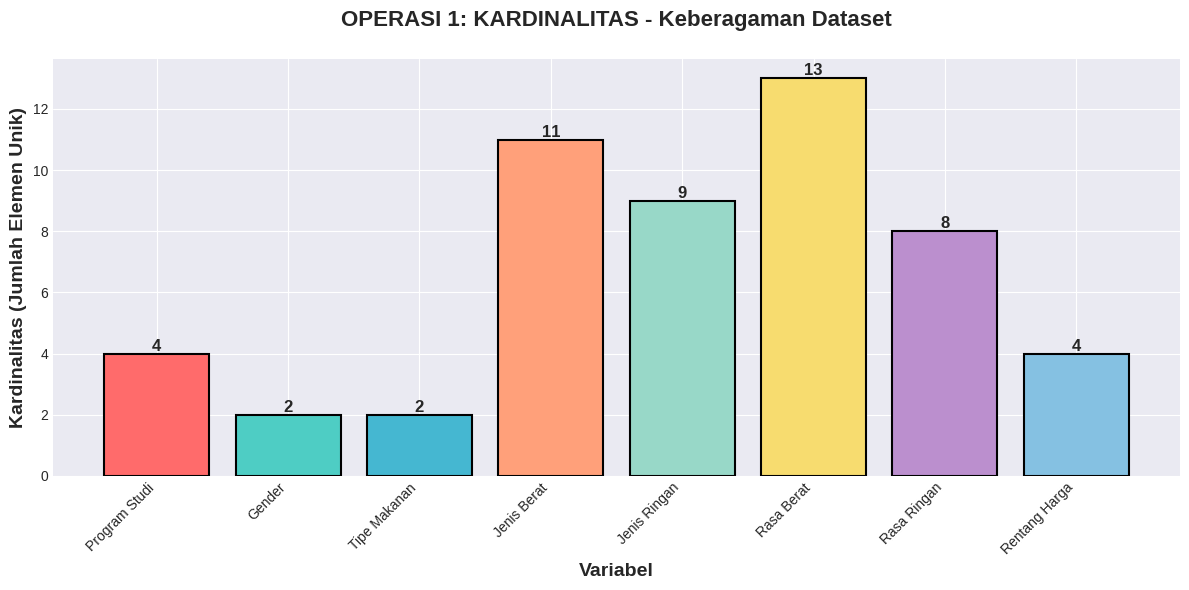

✅ Visualisasi 1 tersimpan: 01_kardinalitas.png

📝 PENJELASAN:
   Grafik ini menunjukkan keberagaman (kardinalitas) setiap variabel.
   Semakin tinggi bar, semakin banyak variasi pilihan dalam variabel tersebut.
   Berguna untuk melihat variabel mana yang paling beragam.


[2/10] Membuat visualisasi distribusi tipe makanan...


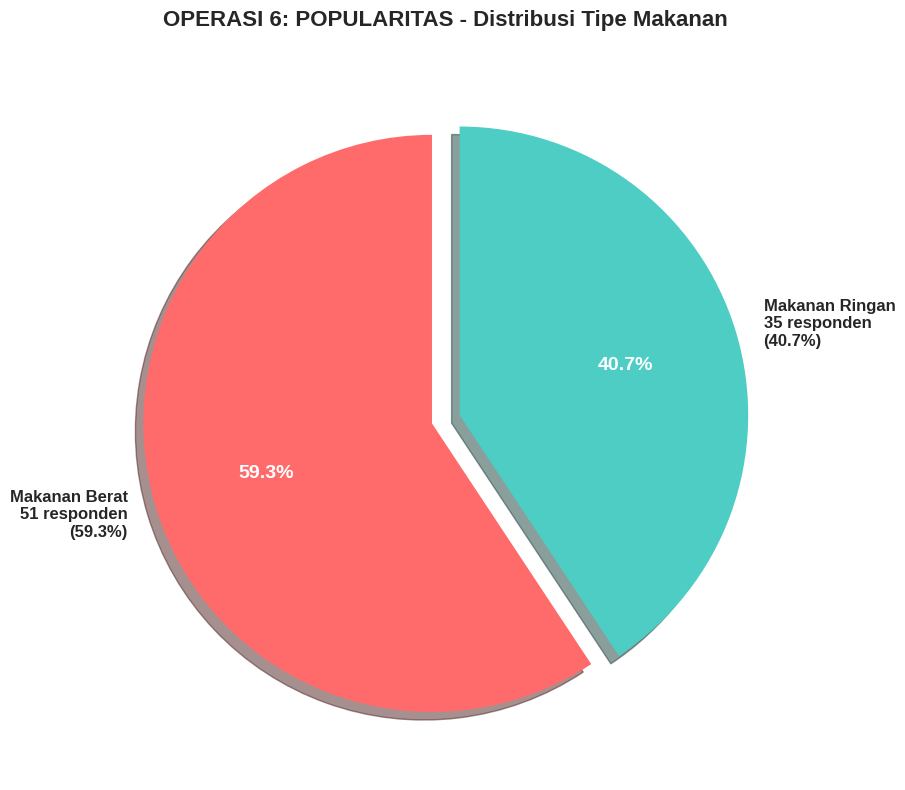

✅ Visualisasi 2 tersimpan: 02_distribusi_tipe.png

📝 PENJELASAN:
   Pie chart menampilkan proporsi responden yang memilih makanan berat vs ringan.
   Memudahkan melihat tipe makanan mana yang lebih dominan dipilih.


[3/10] Membuat visualisasi top makanan...


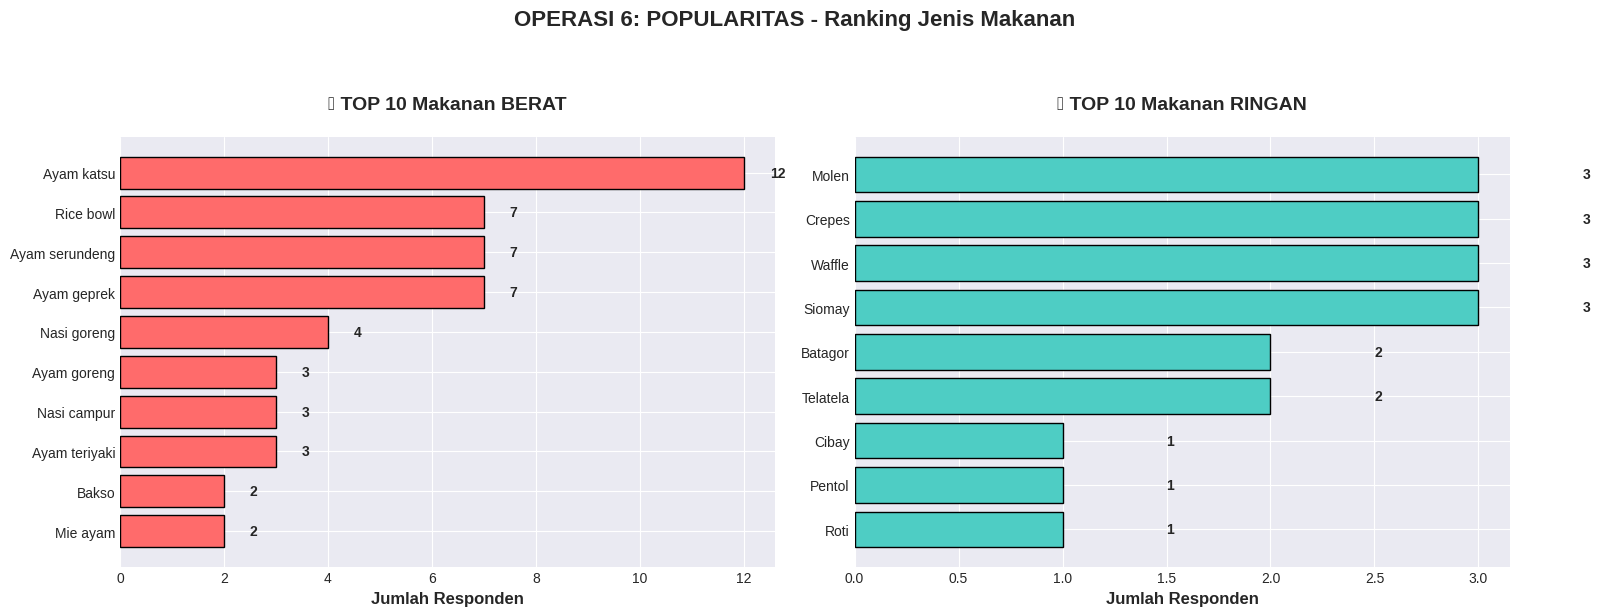

✅ Visualisasi 3 tersimpan: 03_top_makanan.png

📝 PENJELASAN:
   Horizontal bar chart menampilkan 10 jenis makanan paling populer
   untuk kategori berat (kiri) dan ringan (kanan).
   Berguna untuk identifikasi menu favorit mahasiswa.


[4/10] Membuat visualisasi rasa favorit...


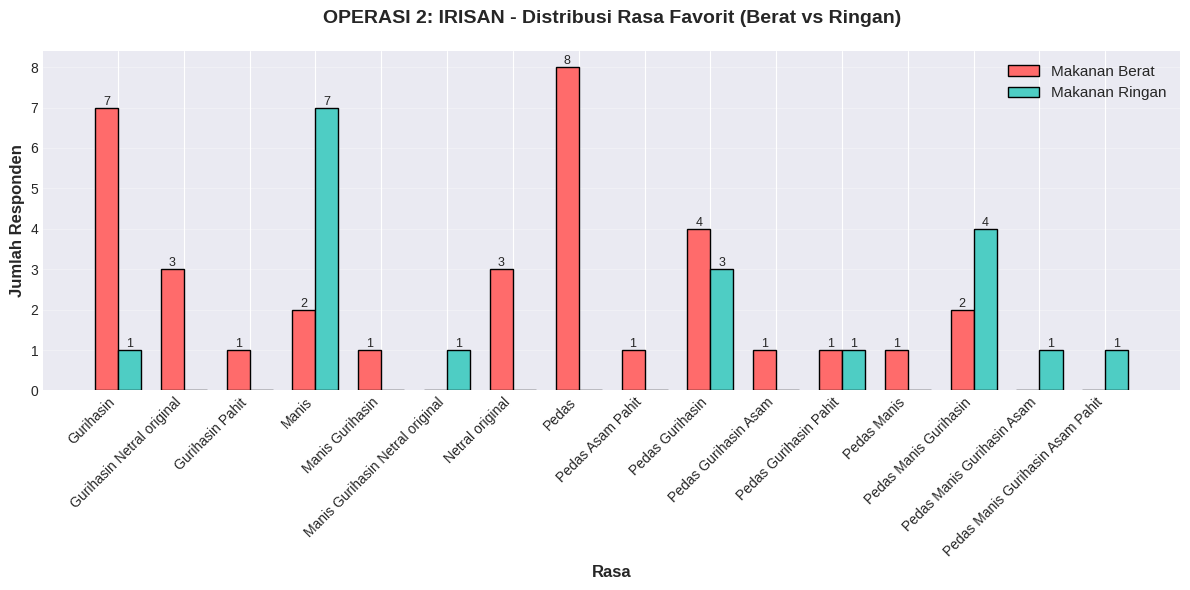

✅ Visualisasi 4 tersimpan: 04_rasa_favorit.png

📝 PENJELASAN:
   Grouped bar chart membandingkan preferensi rasa antara makanan berat dan ringan.
   Rasa yang tinggi di kedua kategori menunjukkan 'rasa universal'.
   Berguna untuk melihat irisan preferensi rasa.


[5/10] Membuat visualisasi preferensi per prodi...


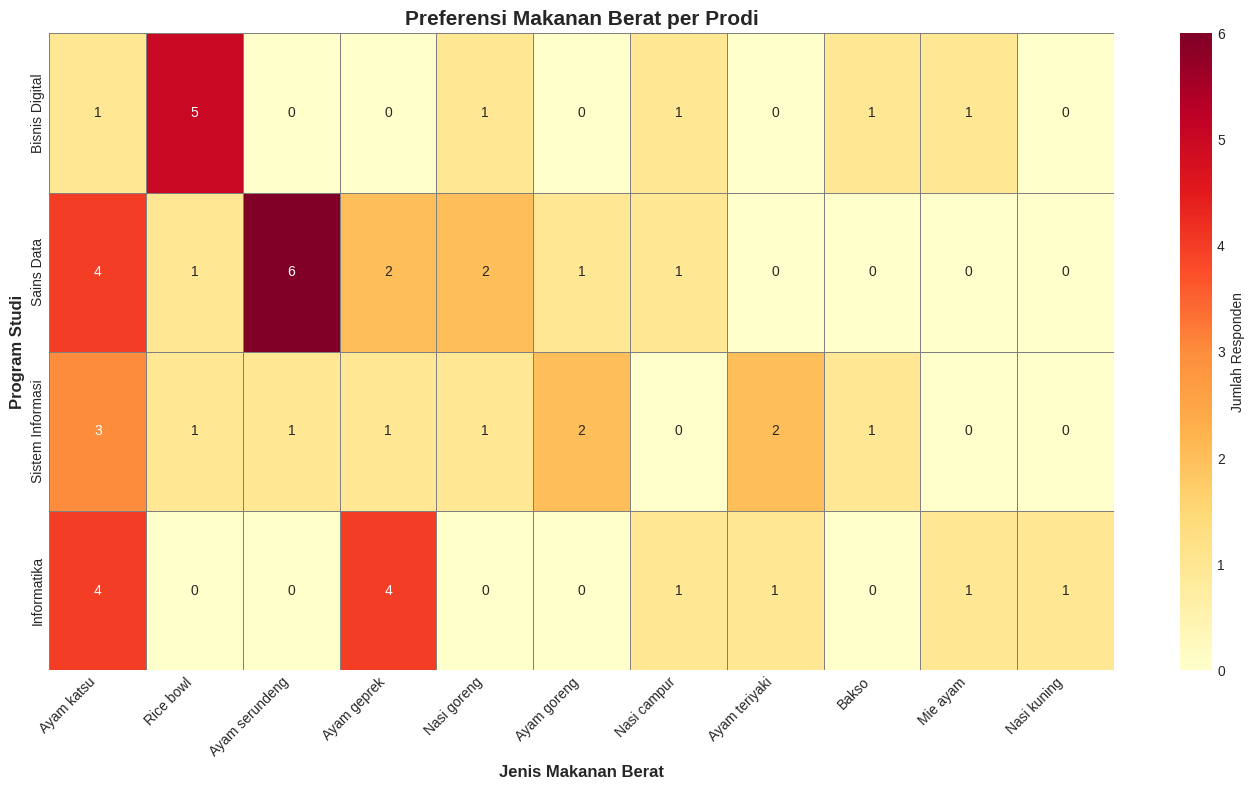

✅ Heatmap makanan berat tersimpan: 05A_heatmap_prodi_berat.png


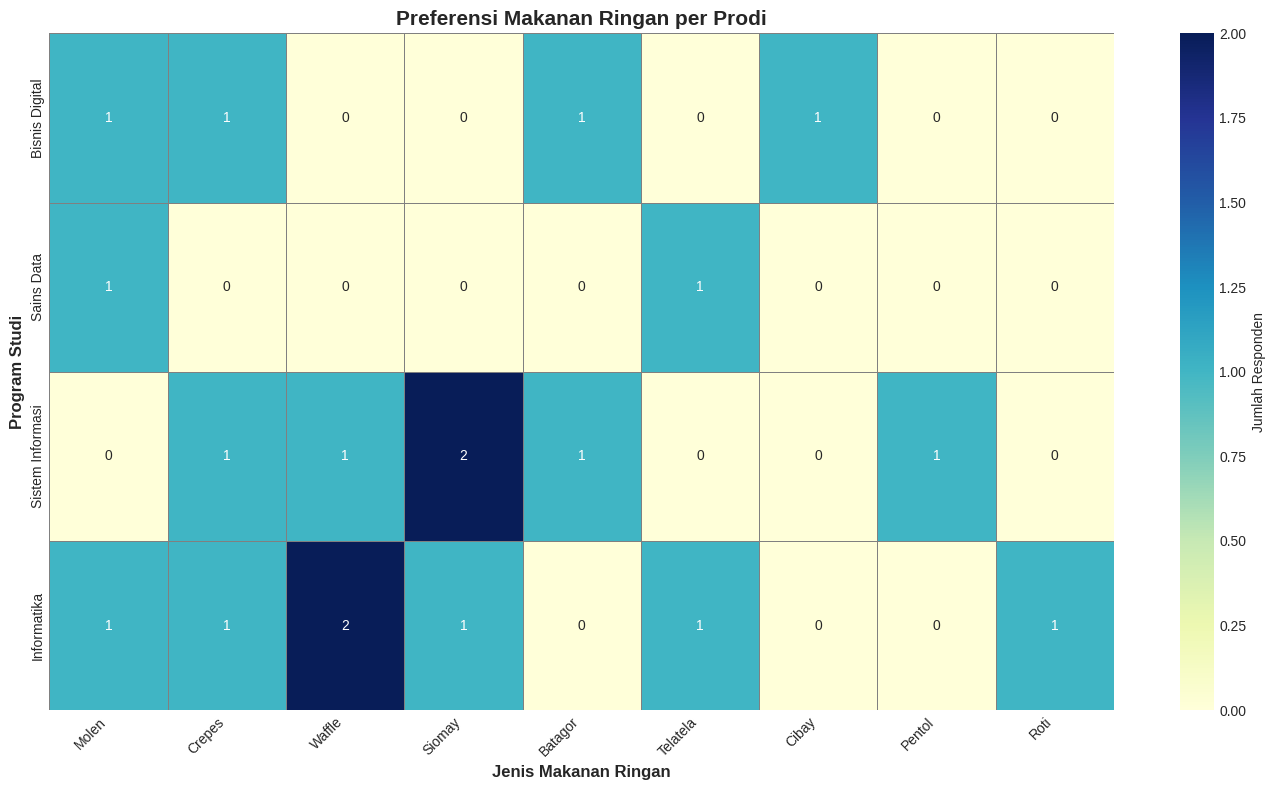

✅ Heatmap makanan ringan tersimpan: 05B_heatmap_prodi_ringan.png

[6/10] Membuat visualisasi Jaccard similarity...


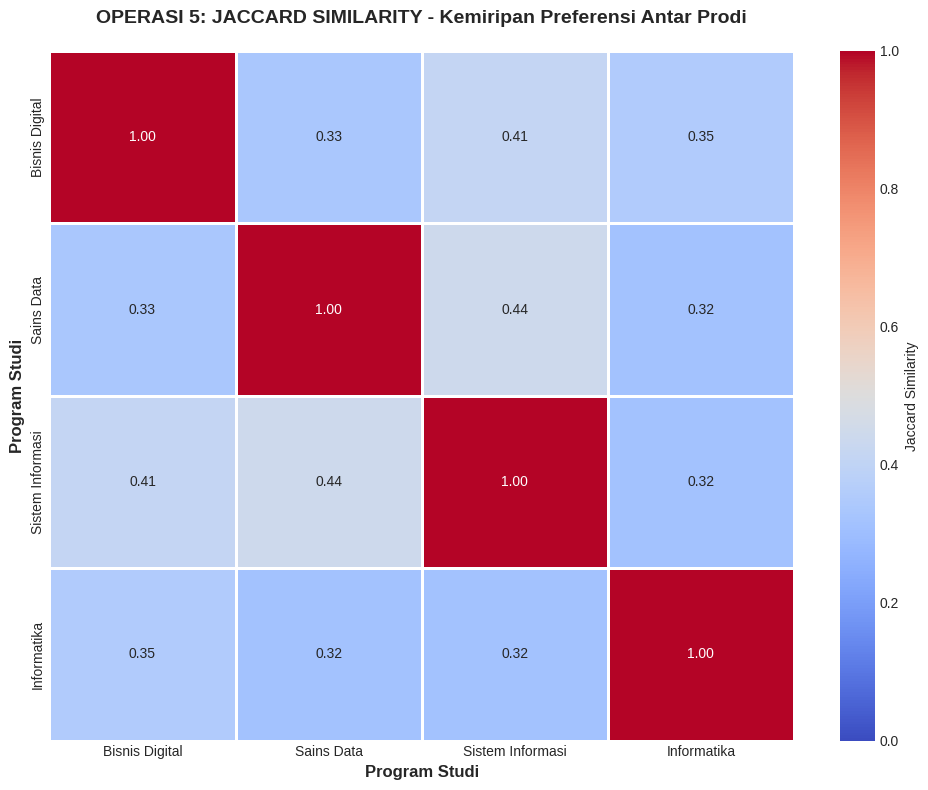

✅ Visualisasi 6 tersimpan: 06_jaccard_similarity.png

📝 PENJELASAN:
   Heatmap similarity menunjukkan seberapa mirip preferensi antar prodi.
   Nilai 1.0 (merah) = sangat mirip, 0.0 (biru) = sangat berbeda.
   Berguna untuk clustering prodi berdasarkan preferensi makanan.


[7/10] Membuat visualisasi distribusi harga...


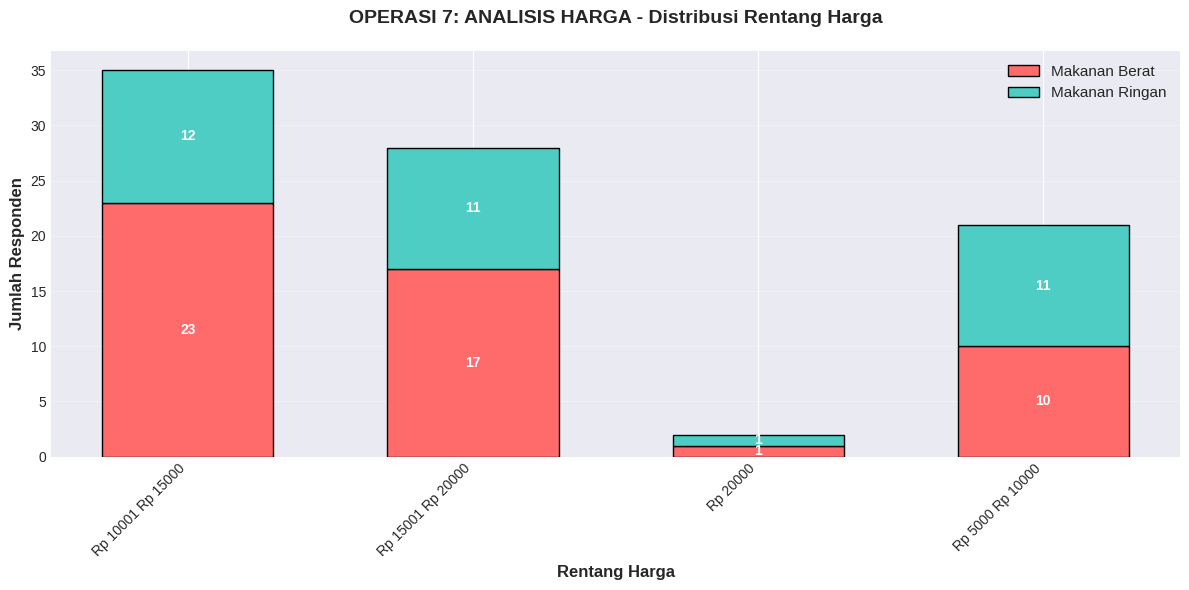

✅ Visualisasi 7 tersimpan: 07_distribusi_harga.png

📝 PENJELASAN:
   Stacked bar chart menunjukkan distribusi preferensi harga.
   Setiap bar dibagi menjadi makanan berat (bawah) dan ringan (atas).
   Membantu kantin menentukan range harga yang paling diminati.


[8/10] Membuat visualisasi Venn diagram...


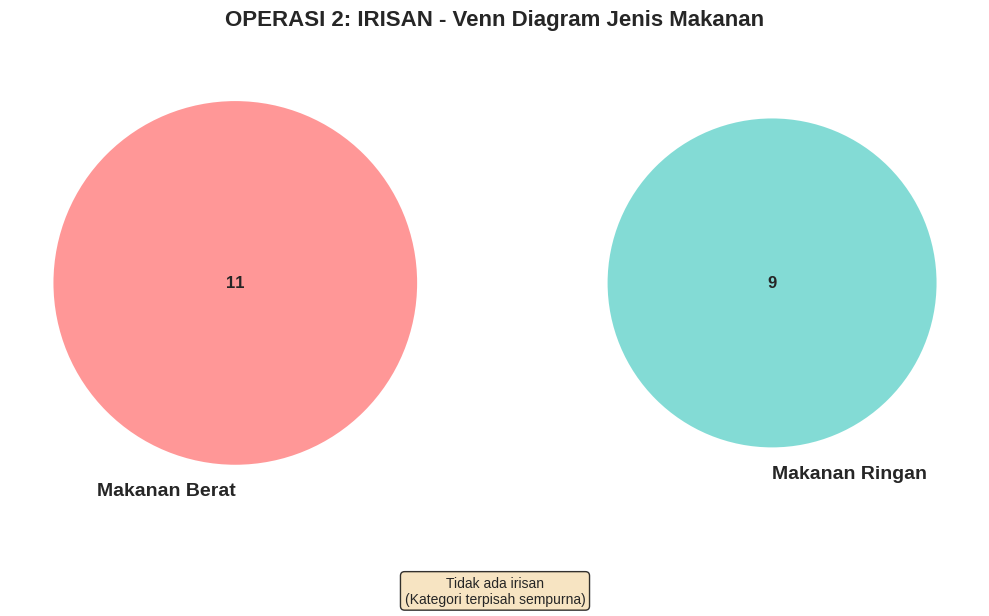

✅ Visualisasi 8 tersimpan: 08_venn_diagram.png

📝 PENJELASAN:
   Venn diagram menampilkan irisan antara jenis makanan berat dan ringan.
   Area tengah yang overlap = makanan yang ada di kedua kategori.
   Area unik di kiri/kanan = makanan eksklusif di satu kategori.


[9/10] Membuat visualisasi preferensi per gender...


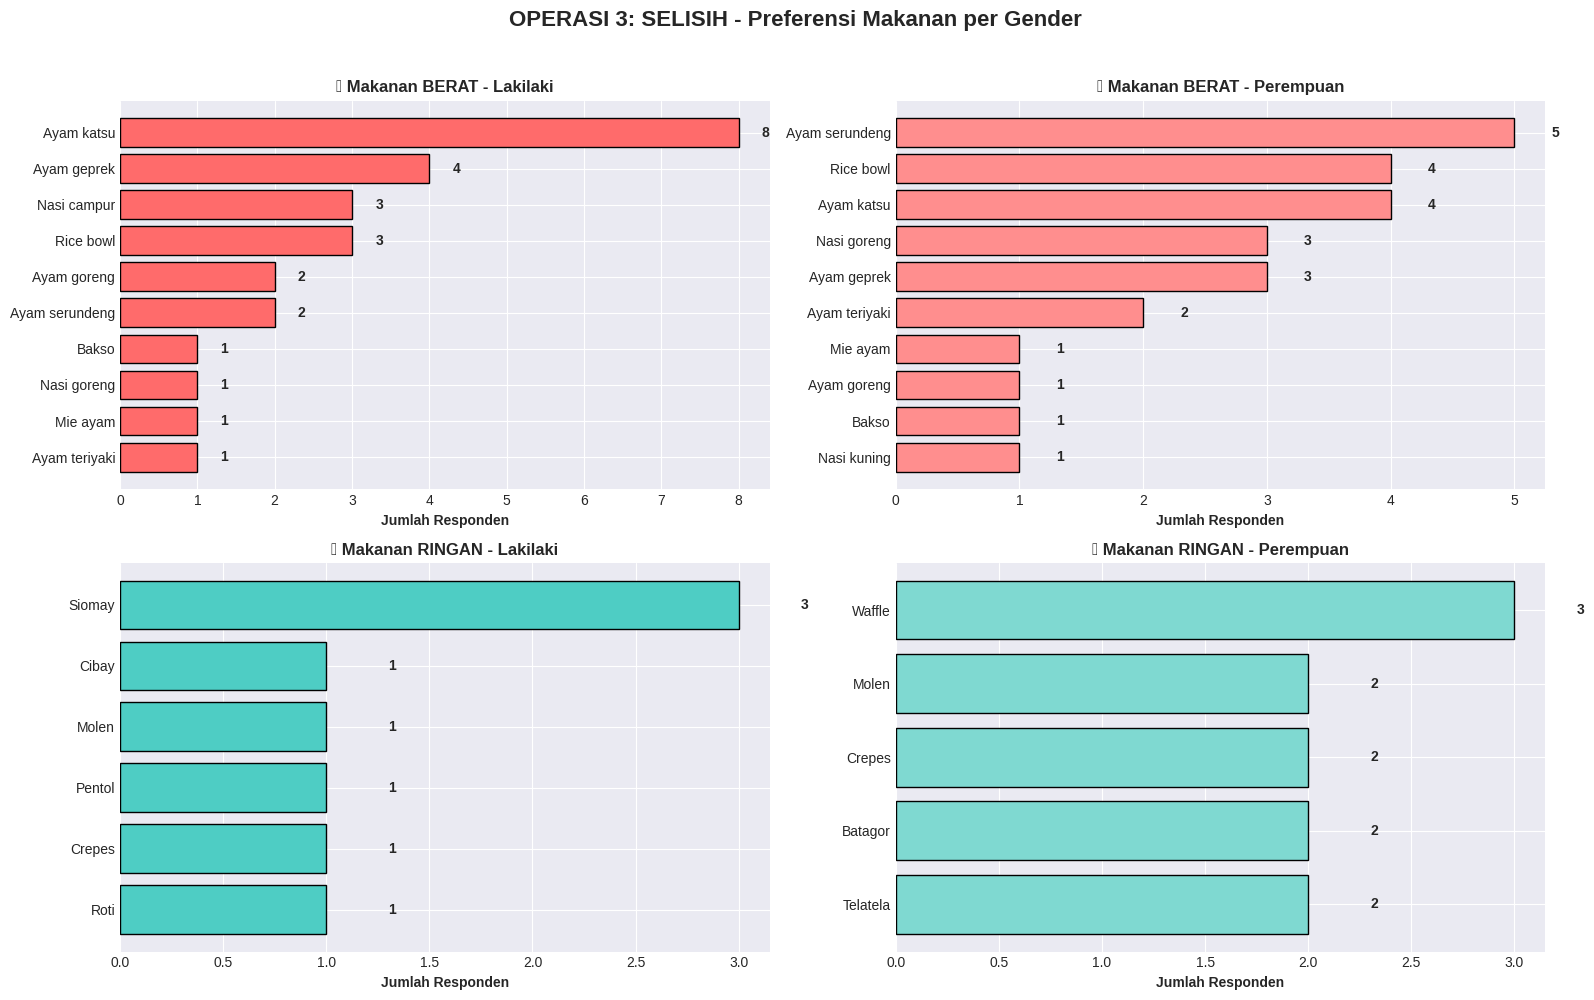

✅ Visualisasi 9 tersimpan: 09_preferensi_gender.png

📝 PENJELASAN:
   4 panel menampilkan top 10 makanan favorit untuk setiap gender.
   Baris atas = makanan berat, baris bawah = makanan ringan.
   Memudahkan identifikasi perbedaan preferensi antar gender.


✅ SEMUA VISUALISASI SELESAI!

📁 File yang dihasilkan:
   01_kardinalitas.png
   02_distribusi_tipe.png
   03_top_makanan.png
   04_rasa_favorit.png
   05_heatmap_prodi.png
   06_jaccard_similarity.png
   07_distribusi_harga.png
   08_venn_diagram.png
   09_preferensi_gender.png

📊 RANGKUMAN VISUALISASI

1. KARDINALITAS (Bar Chart)
   → Menampilkan keberagaman setiap variabel
   → Insight: Variabel mana yang paling bervariasi

2. DISTRIBUSI TIPE (Pie Chart)
   → Proporsi responden yang pilih berat vs ringan
   → Insight: Tipe makanan mana yang lebih dominan

3. TOP MAKANAN (Horizontal Bar)
   → 10 makanan paling populer untuk berat & ringan
   → Insight: Menu favorit mahasiswa per kategori

4. RASA FAVORIT (Grouped Bar)
   → Perband

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi yang menarik
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ============================================
# LOAD DATA
# ============================================

df = pd.read_csv("Preferensi_Makanan_Kantin_UPN_clean.csv", encoding='latin1')

# Index kolom
idx_prodi = 0
idx_gender = 1
idx_tipe_makanan = 2
idx_jenis_makanan1 = 3
idx_rasa1 = 4
idx_jenis_makanan2 = 5
idx_rasa2 = 6
idx_harga = 7

# Pisahkan data berat dan ringan
df_berat = df[df[df.columns[idx_tipe_makanan]].str.lower().str.contains('berat', na=False)]
df_ringan = df[df[df.columns[idx_tipe_makanan]].str.lower().str.contains('ringan', na=False)]

print("=" * 80)
print("📊 VISUALISASI ANALISIS PREFERENSI MAKANAN UPN")
print("=" * 80)
print(f"\nTotal data: {len(df)} responden")
print(f"Makanan Berat: {len(df_berat)} responden")
print(f"Makanan Ringan: {len(df_ringan)} responden\n")

# ============================================
# VISUALISASI 1: KARDINALITAS (BAR CHART)
# ============================================

def viz_kardinalitas():
    """Visualisasi kardinalitas semua variabel"""

    # Hitung kardinalitas
    kardinalitas = {
        'Program Studi': df[df.columns[idx_prodi]].nunique(),
        'Gender': df[df.columns[idx_gender]].nunique(),
        'Tipe Makanan': df[df.columns[idx_tipe_makanan]].nunique(),
        'Jenis Berat': df_berat[df_berat.columns[idx_jenis_makanan1]].nunique(),
        'Jenis Ringan': df_ringan[df_ringan.columns[idx_jenis_makanan2]].nunique(),
        'Rasa Berat': df_berat[df_berat.columns[idx_rasa1]].nunique(),
        'Rasa Ringan': df_ringan[df_ringan.columns[idx_rasa2]].nunique(),
        'Rentang Harga': df[df.columns[idx_harga]].nunique()
    }

    # Buat visualisasi
    fig, ax = plt.subplots(figsize=(12, 6))

    variabel = list(kardinalitas.keys())
    nilai = list(kardinalitas.values())

    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F', '#BB8FCE', '#85C1E2']
    bars = ax.bar(variabel, nilai, color=colors, edgecolor='black', linewidth=1.5)

    # Tambahkan nilai di atas bar
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=12, fontweight='bold')

    ax.set_xlabel('Variabel', fontsize=14, fontweight='bold')
    ax.set_ylabel('Kardinalitas (Jumlah Elemen Unik)', fontsize=14, fontweight='bold')
    ax.set_title('OPERASI 1: KARDINALITAS - Keberagaman Dataset\n', fontsize=16, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('01_kardinalitas.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("✅ Visualisasi 1 tersimpan: 01_kardinalitas.png")
    print("\n📝 PENJELASAN:")
    print("   Grafik ini menunjukkan keberagaman (kardinalitas) setiap variabel.")
    print("   Semakin tinggi bar, semakin banyak variasi pilihan dalam variabel tersebut.")
    print("   Berguna untuk melihat variabel mana yang paling beragam.\n")

# ============================================
# VISUALISASI 2: DISTRIBUSI TIPE MAKANAN (PIE CHART)
# ============================================

def viz_distribusi_tipe():
    """Visualisasi distribusi tipe makanan berat vs ringan"""

    fig, ax = plt.subplots(figsize=(10, 8))

    jumlah_berat = len(df_berat)
    jumlah_ringan = len(df_ringan)

    sizes = [jumlah_berat, jumlah_ringan]
    labels = [f'Makanan Berat\n{jumlah_berat} responden\n({jumlah_berat/len(df)*100:.1f}%)',
              f'Makanan Ringan\n{jumlah_ringan} responden\n({jumlah_ringan/len(df)*100:.1f}%)']
    colors = ['#FF6B6B', '#4ECDC4']
    explode = (0.05, 0.05)

    wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%',
                                        startangle=90, colors=colors, explode=explode,
                                        textprops={'fontsize': 12, 'fontweight': 'bold'},
                                        shadow=True)

    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(14)
        autotext.set_fontweight('bold')

    ax.set_title('OPERASI 6: POPULARITAS - Distribusi Tipe Makanan\n',
                 fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig('02_distribusi_tipe.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("✅ Visualisasi 2 tersimpan: 02_distribusi_tipe.png")
    print("\n📝 PENJELASAN:")
    print("   Pie chart menampilkan proporsi responden yang memilih makanan berat vs ringan.")
    print("   Memudahkan melihat tipe makanan mana yang lebih dominan dipilih.\n")

# ============================================
# VISUALISASI 3: TOP 10 MAKANAN BERAT & RINGAN
# ============================================

def viz_top_makanan():
    """Visualisasi top 10 makanan berat dan ringan"""

    col_jenis1 = df.columns[idx_jenis_makanan1]
    col_jenis2 = df.columns[idx_jenis_makanan2]

    # Top 10 makanan berat
    top_berat = df_berat[col_jenis1].value_counts().head(10)

    # Top 10 makanan ringan
    top_ringan = df_ringan[col_jenis2].value_counts().head(10)

    # Buat subplot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Plot makanan berat
    bars1 = ax1.barh(range(len(top_berat)), top_berat.values, color='#FF6B6B', edgecolor='black')
    ax1.set_yticks(range(len(top_berat)))
    ax1.set_yticklabels(top_berat.index)
    ax1.invert_yaxis()
    ax1.set_xlabel('Jumlah Responden', fontsize=12, fontweight='bold')
    ax1.set_title('🍖 TOP 10 Makanan BERAT\n', fontsize=14, fontweight='bold')

    # Tambahkan nilai di bar
    for i, (bar, val) in enumerate(zip(bars1, top_berat.values)):
        ax1.text(val + 0.5, i, str(val), va='center', fontweight='bold')

    # Plot makanan ringan
    bars2 = ax2.barh(range(len(top_ringan)), top_ringan.values, color='#4ECDC4', edgecolor='black')
    ax2.set_yticks(range(len(top_ringan)))
    ax2.set_yticklabels(top_ringan.index)
    ax2.invert_yaxis()
    ax2.set_xlabel('Jumlah Responden', fontsize=12, fontweight='bold')
    ax2.set_title('🥖 TOP 10 Makanan RINGAN\n', fontsize=14, fontweight='bold')

    # Tambahkan nilai di bar
    for i, (bar, val) in enumerate(zip(bars2, top_ringan.values)):
        ax2.text(val + 0.5, i, str(val), va='center', fontweight='bold')

    plt.suptitle('OPERASI 6: POPULARITAS - Ranking Jenis Makanan\n',
                 fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.savefig('03_top_makanan.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("✅ Visualisasi 3 tersimpan: 03_top_makanan.png")
    print("\n📝 PENJELASAN:")
    print("   Horizontal bar chart menampilkan 10 jenis makanan paling populer")
    print("   untuk kategori berat (kiri) dan ringan (kanan).")
    print("   Berguna untuk identifikasi menu favorit mahasiswa.\n")

# ============================================
# VISUALISASI 4: DISTRIBUSI RASA FAVORIT
# ============================================

def viz_rasa_favorit():
    """Visualisasi distribusi rasa favorit untuk berat dan ringan"""

    col_rasa1 = df.columns[idx_rasa1]
    col_rasa2 = df.columns[idx_rasa2]

    # Hitung frekuensi rasa
    rasa_berat = df_berat[col_rasa1].value_counts()
    rasa_ringan = df_ringan[col_rasa2].value_counts()

    # Gabungkan semua rasa unik
    semua_rasa = sorted(set(rasa_berat.index) | set(rasa_ringan.index))

    # Siapkan data untuk plotting
    nilai_berat = [rasa_berat.get(r, 0) for r in semua_rasa]
    nilai_ringan = [rasa_ringan.get(r, 0) for r in semua_rasa]

    # Buat grouped bar chart
    fig, ax = plt.subplots(figsize=(12, 6))

    x = np.arange(len(semua_rasa))
    width = 0.35

    bars1 = ax.bar(x - width/2, nilai_berat, width, label='Makanan Berat',
                   color='#FF6B6B', edgecolor='black')
    bars2 = ax.bar(x + width/2, nilai_ringan, width, label='Makanan Ringan',
                   color='#4ECDC4', edgecolor='black')

    ax.set_xlabel('Rasa', fontsize=12, fontweight='bold')
    ax.set_ylabel('Jumlah Responden', fontsize=12, fontweight='bold')
    ax.set_title('OPERASI 2: IRISAN - Distribusi Rasa Favorit (Berat vs Ringan)\n',
                 fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(semua_rasa, rotation=45, ha='right')
    ax.legend(fontsize=11)
    ax.grid(axis='y', alpha=0.3)

    # Tambahkan nilai di atas bar
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                ax.text(bar.get_x() + bar.get_width()/2., height,
                       f'{int(height)}',
                       ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.savefig('04_rasa_favorit.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("✅ Visualisasi 4 tersimpan: 04_rasa_favorit.png")
    print("\n📝 PENJELASAN:")
    print("   Grouped bar chart membandingkan preferensi rasa antara makanan berat dan ringan.")
    print("   Rasa yang tinggi di kedua kategori menunjukkan 'rasa universal'.")
    print("   Berguna untuk melihat irisan preferensi rasa.\n")

# ============================================
# VISUALISASI 5: PREFERENSI PER PRODI (HEATMAP)
# ============================================

def viz_preferensi_prodi_dual():
    """Visualisasi preferensi makanan berat & ringan per prodi"""

    col_prodi = df.columns[idx_prodi]
    col_jenis1 = df.columns[idx_jenis_makanan1]   # Makanan berat
    col_jenis2 = df.columns[idx_jenis_makanan2]   # Makanan ringan

    prodi_list = df[col_prodi].unique()

    # ==========================================
    # HEATMAP A — MAKANAN BERAT
    # ==========================================

    top_berat = df_berat[col_jenis1].value_counts().head(15).index
    data_matrix_berat = []

    for prodi in prodi_list:
        df_p = df_berat[df_berat[col_prodi] == prodi]
        counts = df_p[col_jenis1].value_counts()
        row = [int(counts.get(m, 0)) for m in top_berat]
        data_matrix_berat.append(row)

    fig, ax = plt.subplots(figsize=(14, 8))
    sns.heatmap(data_matrix_berat, annot=True, fmt='d', cmap='YlOrRd',
                xticklabels=top_berat, yticklabels=prodi_list,
                cbar_kws={'label': 'Jumlah Responden'}, linewidths=0.5,
                linecolor='gray', ax=ax)

    ax.set_xlabel('Jenis Makanan Berat', fontsize=12, fontweight='bold')
    ax.set_ylabel('Program Studi', fontsize=12, fontweight='bold')
    ax.set_title('Preferensi Makanan Berat per Prodi', fontsize=15, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('05A_heatmap_prodi_berat.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("✅ Heatmap makanan berat tersimpan: 05A_heatmap_prodi_berat.png")


    # ==========================================
    # HEATMAP B — MAKANAN RINGAN
    # ==========================================

    top_ringan = df_ringan[col_jenis2].value_counts().head(15).index
    data_matrix_ringan = []

    for prodi in prodi_list:
        df_p = df_ringan[df_ringan[col_prodi] == prodi]
        counts = df_p[col_jenis2].value_counts()
        row = [int(counts.get(m, 0)) for m in top_ringan]
        data_matrix_ringan.append(row)

    fig, ax = plt.subplots(figsize=(14, 8))
    sns.heatmap(data_matrix_ringan, annot=True, fmt='d', cmap='YlGnBu',
                xticklabels=top_ringan, yticklabels=prodi_list,
                cbar_kws={'label': 'Jumlah Responden'}, linewidths=0.5,
                linecolor='gray', ax=ax)

    ax.set_xlabel('Jenis Makanan Ringan', fontsize=12, fontweight='bold')
    ax.set_ylabel('Program Studi', fontsize=12, fontweight='bold')
    ax.set_title('Preferensi Makanan Ringan per Prodi', fontsize=15, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('05B_heatmap_prodi_ringan.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("✅ Heatmap makanan ringan tersimpan: 05B_heatmap_prodi_ringan.png")

# ============================================
# VISUALISASI 6: JACCARD SIMILARITY MATRIX
# ============================================

def viz_jaccard_similarity():
    """Visualisasi Jaccard Similarity antar prodi"""

    col_prodi = df.columns[idx_prodi]
    col_jenis1 = df.columns[idx_jenis_makanan1]
    col_jenis2 = df.columns[idx_jenis_makanan2]

    prodi_list = list(df_berat[col_prodi].unique())

    # Buat himpunan per prodi
    himpunan_per_prodi = {}
    for prodi in prodi_list:
      df_prodi = df[df[col_prodi] == prodi]

    # Gabungkan dua kolom jenis makanan menjadi satu himpunan
      set_jenis = set()

    # dari JenisMakanan1
      set_jenis.update(df_prodi[col_jenis1].dropna().unique())

    # dari JenisMakanan2
      set_jenis.update(df_prodi[col_jenis2].dropna().unique())

      himpunan_per_prodi[prodi] = set_jenis

    # Hitung Jaccard similarity
    n = len(prodi_list)
    similarity_matrix = np.zeros((n, n))

    for i, prodi_a in enumerate(prodi_list):
        for j, prodi_b in enumerate(prodi_list):
            if i == j:
                similarity_matrix[i][j] = 1.0
            else:
                set_a = himpunan_per_prodi[prodi_a]
                set_b = himpunan_per_prodi[prodi_b]
                intersection = len(set_a & set_b)
                union = len(set_a | set_b)
                similarity_matrix[i][j] = intersection / union if union > 0 else 0

    # Buat heatmap
    fig, ax = plt.subplots(figsize=(10, 8))

    sns.heatmap(similarity_matrix, annot=True, fmt='.2f', cmap='coolwarm',
                xticklabels=prodi_list, yticklabels=prodi_list,
                vmin=0, vmax=1, cbar_kws={'label': 'Jaccard Similarity'},
                linewidths=1, linecolor='white', ax=ax)

    ax.set_xlabel('Program Studi', fontsize=12, fontweight='bold')
    ax.set_ylabel('Program Studi', fontsize=12, fontweight='bold')
    ax.set_title('OPERASI 5: JACCARD SIMILARITY - Kemiripan Preferensi Antar Prodi\n',
                 fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('06_jaccard_similarity.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("✅ Visualisasi 6 tersimpan: 06_jaccard_similarity.png")
    print("\n📝 PENJELASAN:")
    print("   Heatmap similarity menunjukkan seberapa mirip preferensi antar prodi.")
    print("   Nilai 1.0 (merah) = sangat mirip, 0.0 (biru) = sangat berbeda.")
    print("   Berguna untuk clustering prodi berdasarkan preferensi makanan.\n")

# ============================================
# VISUALISASI 7: DISTRIBUSI HARGA
# ============================================

def viz_distribusi_harga():
    """Visualisasi distribusi rentang harga"""

    col_harga = df.columns[idx_harga]

    # Hitung distribusi
    harga_berat = df_berat[col_harga].value_counts().sort_index()
    harga_ringan = df_ringan[col_harga].value_counts().sort_index()

    # Gabungkan kategori harga
    semua_harga = sorted(set(harga_berat.index) | set(harga_ringan.index))

    nilai_berat = [harga_berat.get(h, 0) for h in semua_harga]
    nilai_ringan = [harga_ringan.get(h, 0) for h in semua_harga]

    # Buat stacked bar chart
    fig, ax = plt.subplots(figsize=(12, 6))

    x = np.arange(len(semua_harga))
    width = 0.6

    bars1 = ax.bar(x, nilai_berat, width, label='Makanan Berat',
                   color='#FF6B6B', edgecolor='black')
    bars2 = ax.bar(x, nilai_ringan, width, bottom=nilai_berat,
                   label='Makanan Ringan', color='#4ECDC4', edgecolor='black')

    ax.set_xlabel('Rentang Harga', fontsize=12, fontweight='bold')
    ax.set_ylabel('Jumlah Responden', fontsize=12, fontweight='bold')
    ax.set_title('OPERASI 7: ANALISIS HARGA - Distribusi Rentang Harga\n',
                 fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(semua_harga, rotation=45, ha='right')
    ax.legend(fontsize=11)
    ax.grid(axis='y', alpha=0.3)

    # Tambahkan label nilai
    for i, (b, r) in enumerate(zip(nilai_berat, nilai_ringan)):
        if b > 0:
            ax.text(i, b/2, str(b), ha='center', va='center',
                   fontweight='bold', color='white')
        if r > 0:
            ax.text(i, b + r/2, str(r), ha='center', va='center',
                   fontweight='bold', color='white')

    plt.tight_layout()
    plt.savefig('07_distribusi_harga.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("✅ Visualisasi 7 tersimpan: 07_distribusi_harga.png")
    print("\n📝 PENJELASAN:")
    print("   Stacked bar chart menunjukkan distribusi preferensi harga.")
    print("   Setiap bar dibagi menjadi makanan berat (bawah) dan ringan (atas).")
    print("   Membantu kantin menentukan range harga yang paling diminati.\n")

# ============================================
# VISUALISASI 8: VENN DIAGRAM (IRISAN)
# ============================================

def viz_venn_diagram():
    """Visualisasi Venn diagram untuk irisan jenis makanan"""
    from matplotlib_venn import venn2

    col_jenis1 = df.columns[idx_jenis_makanan1]
    col_jenis2 = df.columns[idx_jenis_makanan2]

    # Buat himpunan
    set_berat = set(df_berat[col_jenis1].dropna().unique())
    set_ringan = set(df_ringan[col_jenis2].dropna().unique())

    # Buat Venn diagram
    fig, ax = plt.subplots(figsize=(10, 8))

    venn = venn2([set_berat, set_ringan],
                 set_labels=('Makanan Berat', 'Makanan Ringan'),
                 set_colors=('#FF6B6B', '#4ECDC4'),
                 alpha=0.7, ax=ax)

    # Styling
    for text in venn.set_labels:
        text.set_fontsize(14)
        text.set_fontweight('bold')

    for text in venn.subset_labels:
        if text:
            text.set_fontsize(12)
            text.set_fontweight('bold')

    ax.set_title('OPERASI 2: IRISAN - Venn Diagram Jenis Makanan\n',
                 fontsize=16, fontweight='bold')

    # Tambahkan keterangan
    irisan = set_berat & set_ringan
    if irisan:
        textstr = f'Irisan ({len(irisan)} jenis):\n' + ', '.join(list(irisan)[:5])
        if len(irisan) > 5:
            textstr += f'\n... dan {len(irisan)-5} lainnya'
    else:
        textstr = 'Tidak ada irisan\n(Kategori terpisah sempurna)'

    props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
    ax.text(0.5, -0.15, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', horizontalalignment='center', bbox=props)

    plt.tight_layout()
    plt.savefig('08_venn_diagram.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("✅ Visualisasi 8 tersimpan: 08_venn_diagram.png")
    print("\n📝 PENJELASAN:")
    print("   Venn diagram menampilkan irisan antara jenis makanan berat dan ringan.")
    print("   Area tengah yang overlap = makanan yang ada di kedua kategori.")
    print("   Area unik di kiri/kanan = makanan eksklusif di satu kategori.\n")

# ============================================
# VISUALISASI 9: PREFERENSI PER GENDER
# ============================================

def viz_preferensi_gender():
    """Visualisasi preferensi makanan per gender"""

    col_gender = df.columns[idx_gender]
    col_jenis1 = df.columns[idx_jenis_makanan1]
    col_jenis2 = df.columns[idx_jenis_makanan2]

    gender_list = df[col_gender].unique()

    if len(gender_list) >= 2:
        # Ambil top 10 makanan untuk setiap gender
        fig, axes = plt.subplots(2, 2, figsize=(16, 10))

        colors_berat = ['#FF6B6B', '#FF8E8E']
        colors_ringan = ['#4ECDC4', '#7FD9D1']

        for idx_gender_val, gender in enumerate(gender_list[:2]):
            # Makanan berat
            df_gender_berat = df_berat[df_berat[col_gender] == gender]
            top_berat = df_gender_berat[col_jenis1].value_counts().head(10)

            ax1 = axes[0, idx_gender_val]
            bars = ax1.barh(range(len(top_berat)), top_berat.values,
                           color=colors_berat[idx_gender_val], edgecolor='black')
            ax1.set_yticks(range(len(top_berat)))
            ax1.set_yticklabels(top_berat.index)
            ax1.invert_yaxis()
            ax1.set_xlabel('Jumlah Responden', fontsize=10, fontweight='bold')
            ax1.set_title(f'🍖 Makanan BERAT - {gender}', fontsize=12, fontweight='bold')

            for i, (bar, val) in enumerate(zip(bars, top_berat.values)):
                ax1.text(val + 0.3, i, str(val), va='center', fontweight='bold')

            # Makanan ringan
            df_gender_ringan = df_ringan[df_ringan[col_gender] == gender]
            top_ringan = df_gender_ringan[col_jenis2].value_counts().head(10)

            ax2 = axes[1, idx_gender_val]
            bars = ax2.barh(range(len(top_ringan)), top_ringan.values,
                           color=colors_ringan[idx_gender_val], edgecolor='black')
            ax2.set_yticks(range(len(top_ringan)))
            ax2.set_yticklabels(top_ringan.index)
            ax2.invert_yaxis()
            ax2.set_xlabel('Jumlah Responden', fontsize=10, fontweight='bold')
            ax2.set_title(f'🥖 Makanan RINGAN - {gender}', fontsize=12, fontweight='bold')

            for i, (bar, val) in enumerate(zip(bars, top_ringan.values)):
                ax2.text(val + 0.3, i, str(val), va='center', fontweight='bold')

        plt.suptitle('OPERASI 3: SELISIH - Preferensi Makanan per Gender\n',
                     fontsize=16, fontweight='bold', y=0.995)
        plt.tight_layout()
        plt.savefig('09_preferensi_gender.png', dpi=300, bbox_inches='tight')
        plt.show()

        print("✅ Visualisasi 9 tersimpan: 09_preferensi_gender.png")
        print("\n📝 PENJELASAN:")
        print("   4 panel menampilkan top 10 makanan favorit untuk setiap gender.")
        print("   Baris atas = makanan berat, baris bawah = makanan ringan.")
        print("   Memudahkan identifikasi perbedaan preferensi antar gender.\n")

# ============================================
# JALANKAN SEMUA VISUALISASI
# ============================================

def jalankan_semua_visualisasi():
    """Jalankan semua visualisasi"""
    print("\n" + "="*80)
    print("🎨 MEMULAI PEMBUATAN VISUALISASI")
    print("="*80 + "\n")

    try:
        print("\n[1/10] Membuat visualisasi kardinalitas...")
        viz_kardinalitas()

        print("\n[2/10] Membuat visualisasi distribusi tipe makanan...")
        viz_distribusi_tipe()

        print("\n[3/10] Membuat visualisasi top makanan...")
        viz_top_makanan()

        print("\n[4/10] Membuat visualisasi rasa favorit...")
        viz_rasa_favorit()

        print("\n[5/10] Membuat visualisasi preferensi per prodi...")
        viz_preferensi_prodi_dual()

        print("\n[6/10] Membuat visualisasi Jaccard similarity...")
        viz_jaccard_similarity()

        print("\n[7/10] Membuat visualisasi distribusi harga...")
        viz_distribusi_harga()

        print("\n[8/10] Membuat visualisasi Venn diagram...")
        try:
            viz_venn_diagram()
        except ImportError:
            print("⚠️ Package matplotlib-venn tidak tersedia. Lewati visualisasi Venn diagram.")
            print("   Install dengan: pip install matplotlib-venn")

        print("\n[9/10] Membuat visualisasi preferensi per gender...")
        viz_preferensi_gender()

        print("\n" + "="*80)
        print("✅ SEMUA VISUALISASI SELESAI!")
        print("="*80)
        print("\n📁 File yang dihasilkan:")
        print("   01_kardinalitas.png")
        print("   02_distribusi_tipe.png")
        print("   03_top_makanan.png")
        print("   04_rasa_favorit.png")
        print("   05_heatmap_prodi.png")
        print("   06_jaccard_similarity.png")
        print("   07_distribusi_harga.png")
        print("   08_venn_diagram.png")
        print("   09_preferensi_gender.png")

        print("\n" + "="*80)
        print("📊 RANGKUMAN VISUALISASI")
        print("="*80)
        print("""
1. KARDINALITAS (Bar Chart)
   → Menampilkan keberagaman setiap variabel
   → Insight: Variabel mana yang paling bervariasi

2. DISTRIBUSI TIPE (Pie Chart)
   → Proporsi responden yang pilih berat vs ringan
   → Insight: Tipe makanan mana yang lebih dominan

3. TOP MAKANAN (Horizontal Bar)
   → 10 makanan paling populer untuk berat & ringan
   → Insight: Menu favorit mahasiswa per kategori

4. RASA FAVORIT (Grouped Bar)
   → Perbandingan preferensi rasa berat vs ringan
   → Insight: Rasa universal yang disukai di kedua kategori

5. PREFERENSI PRODI (Heatmap)
   → Intensitas preferensi makanan per prodi
   → Insight: Makanan khas tiap prodi (selisih himpunan)

6. JACCARD SIMILARITY (Heatmap)
   → Kemiripan preferensi antar prodi
   → Insight: Prodi mana yang punya selera mirip

7. DISTRIBUSI HARGA (Stacked Bar)
   → Preferensi rentang harga berat vs ringan
   → Insight: Range harga yang paling diminati

8. VENN DIAGRAM (Venn)
   → Irisan jenis makanan berat dan ringan
   → Insight: Makanan yang ada di kedua kategori

9. PREFERENSI GENDER (Multi-panel Bar)
   → Top makanan favorit per gender
   → Insight: Perbedaan selera antar gender

10. DASHBOARD RINGKASAN (Multi-plot)
    → Kombinasi 5 visualisasi utama
    → Insight: Overview lengkap untuk presentasi
        """)

    except Exception as e:
        print(f"\n❌ Error: {e}")
        print("Pastikan semua library terinstall:")
        print("   pip install pandas matplotlib seaborn matplotlib-venn")

# JALANKAN!
if __name__ == "__main__":
    jalankan_semua_visualisasi()

#RELASI

In [ ]:
import pandas as pd
df = pd.read_csv("/content/Preferensi_Makanan_Kantin.csv")
df

,Timestamp,Program Studi,Gender,Apa tipe makanan yang sering kamu beli?,Jenis Makanan,Rasa favorit kamu apa?,Jenis Makanan,Rasa favorit kamu apa?.1,Rentang harga makanan kamu berapa nih?
0,11/11/2025 10:57:07,Sains Data,Perempuan,Makanan berat,Ayam serundeng,Manis,NaN,NaN,Rp 10.001 – Rp 15.000
1,11/11/2025 10:57:37,Sains Data,Perempuan,Makanan berat,Ayam katsu,Gurih/asin,NaN,NaN,Rp 15.001 – Rp 20.000
2,11/11/2025 10:59:08,Sains Data,Perempuan,Makanan berat,Ayam geprek,Pedas,NaN,NaN,Rp 15.001 – Rp 20.000
3,11/11/2025 11:01:33,Sains Data,Perempuan,Makanan ringan,NaN,NaN,Siomay,Manis,Rp 5.000 – Rp 10.000
4,11/11/2025 11:02:24,Sains Data,Perempuan,Makanan ringan,NaN,NaN,Molen,Manis,Rp 15.001 – Rp 20.000
...,...,...,...,...,...,...,...,...,...
81,11/17/2025 8:51:52,Bisnis Digital,Perempuan,Makanan ringan,NaN,NaN,Waffle,"Pedas, Manis, Gurih/asin",Rp 10.001 – Rp 15.000
82,11/17/2025 9:40:06,Bisnis Digital,Perempuan,Makanan berat,Mie ayam,"Pedas, Manis",NaN,NaN,Rp 15.001 – Rp 20.000
83,11/20/2025 18:47:05,Informatika,Perempuan,Makanan ringan,NaN,NaN,Waffle,Manis,Rp 5.000 – Rp 10.000
84,11/20/2025 18:48:00,Informatika,Laki-laki,Makanan ringan,NaN,NaN,Siomay,"Pedas, Gurih/asin",Rp 10.001 – Rp 15.000


In [ ]:
# ========================================
# SECTION 2 — Data Check (SEBELUM ANALISIS)
# ========================================
print("=== Cek 5 Data Teratas ===")
print(df.head())

print("\n=== Info Dataset ===")
print(df.info())

print("\n=== Unique Tipe Makanan ===")
print(df["TipeMakanan"].unique())


=== Cek 5 Data Teratas ===
             Timestamp Program Studi      Gender    \
0  11/11/2025 10:57:07      Sains Data   Perempuan   
1  11/11/2025 10:57:37      Sains Data   Perempuan   
2  11/11/2025 10:59:08      Sains Data   Perempuan   
3  11/11/2025 11:01:33      Sains Data   Perempuan   
4  11/11/2025 11:02:24      Sains Data   Perempuan   

  Apa tipe makanan yang sering kamu beli?   Jenis Makanan   \
0                           Makanan berat   Ayam serundeng   
1                           Makanan berat       Ayam katsu   
2                           Makanan berat      Ayam geprek   
3                          Makanan ringan              NaN   
4                          Makanan ringan              NaN   

  Rasa favorit kamu apa? Jenis Makanan Rasa favorit kamu apa?.1  \
0                  Manis           NaN                      NaN   
1             Gurih/asin           NaN                      NaN   
2                  Pedas           NaN                      NaN   
3      

KeyError: 'TipeMakanan'

In [ ]:
# ========================================
# SECTION 3 — Analisis Relasi
# ========================================

summary_tipe = df["TipeMakanan"].value_counts()
summary_jenis = df["JenisMakanan"].value_counts()
summary_rasa = df["RasaFavorit"].value_counts()
summary_harga = df["Harga"].value_counts()

# Crosstab relasi antar variabel
ct_tipe_harga = pd.crosstab(df["TipeMakanan"], df["Harga"])
ct_jenis_rasa = pd.crosstab(df["JenisMakanan"], df["RasaFavorit"])
ct_gender_rasa = pd.crosstab(df["Gender"], df["RasaFavorit"])

print("\n=== Crosstab Tipe Makanan x Harga ===")
print(ct_tipe_harga)

print("\n=== Crosstab Jenis Makanan x Rasa ===")
print(ct_jenis_rasa)

print("\n=== Crosstab Gender x Rasa ===")
print(ct_gender_rasa)


KeyError: 'TipeMakanan'

Berdasarkan hasil analisis preferensi makanan mahasiswa, terlihat pola yang cukup jelas antara jenis makanan, harga, rasa, dan perbedaan preferensi antar gender. Makanan berat paling banyak dipilih pada rentang harga menengah, yaitu Rp 10.001–Rp 15.000 dan Rp 15.001–Rp 20.000, sehingga dapat disimpulkan bahwa mahasiswa cenderung memilih makanan berat dengan harga standar yang tidak terlalu murah maupun mahal. Sementara itu, makanan ringan lebih dominan dipilih pada harga Rp 5.000–Rp 10.000, yang menunjukkan bahwa makanan ringan dianggap sebagai pilihan murah dan terjangkau untuk camilan. Dari sisi rasa, makanan berat seperti ayam geprek dan ayam katsu menunjukkan variasi rasa yang lebih beragam seperti pedas dan gurih, sedangkan makanan ringan seperti siomay, crepes, molen, dan waffle lebih terpusat pada rasa manis. Jika dilihat dari gender, perempuan cenderung memilih rasa manis dalam semua jenis makanan, sedangkan laki-laki lebih dominan pada rasa pedas serta kombinasi rasa lainnya.

In [ ]:
import pandas as pd

# Load data
df = pd.read_csv("/content/Preferensi_Makanan_Kantin.csv")

# Normalisasi nama kolom
df.columns = [
    "Timestamp", "ProgramStudi", "Gender",
    "TipeMakanan", "JenisMakanan1", "Rasa1",
    "JenisMakanan2", "Rasa2", "Harga"
]

# Normalisasi teks kategori
df["TipeMakanan"] = df["TipeMakanan"].str.strip().str.lower().str.title()

# Crosstab relasi antar variabel
ct_tipe_harga = pd.crosstab(df["TipeMakanan"], df["Harga"])
ct_jenis_rasa = pd.crosstab(df["JenisMakanan1"], df["Rasa1"])
ct_gender_rasa = pd.crosstab(df["Gender"], df["Rasa1"])

print("\n=== Crosstab Tipe Makanan x Harga ===")
print(ct_tipe_harga)

print("\n=== Crosstab Jenis Makanan x Rasa ===")
print(ct_jenis_rasa)

print("\n=== Crosstab Gender x Rasa ===")
print(ct_gender_rasa)

# =========================
# REKAP TOTAL
# =========================
rekap_tipe_harga = ct_tipe_harga.values.sum()
rekap_jenis_rasa = ct_jenis_rasa.values.sum()
rekap_gender_rasa = ct_gender_rasa.values.sum()

print("\n=== TOTAL REKAP TIPE x HARGA ===")
print(rekap_tipe_harga)

print("\n=== TOTAL REKAP JENIS x RASA ===")
print(rekap_jenis_rasa)

print("\n=== TOTAL REKAP GENDER x RASA ===")
print(rekap_gender_rasa)

print("\n=== Rekap per baris Tipe x Harga ===")
print(ct_tipe_harga.sum(axis=1))

print("\n=== Rekap per kolom Tipe x Harga ===")
print(ct_tipe_harga.sum(axis=0))



=== Crosstab Tipe Makanan x Harga ===
Harga           > Rp 20.000  Rp 10.001 – Rp 15.000  Rp 15.001 – Rp 20.000  \
TipeMakanan                                                                 
Makanan Berat             0                     25                     26   
Makanan Ringan            2                     10                      2   

Harga           Rp 5.000 – Rp 10.000  
TipeMakanan                           
Makanan Berat                      0  
Makanan Ringan                    21  

=== Crosstab Jenis Makanan x Rasa ===
Rasa1            Gurih/asin   Gurih/asin,  Pahit  \
JenisMakanan1                                      
Ayam geprek               0                    0   
Ayam goreng               1                    0   
Ayam katsu                5                    0   
Ayam serundeng            2                    0   
Ayam teriyaki             0                    0   
Bakso                     0                    0   
Mie ayam                  1              


=== TOP 20 JENIS MAKANAN TERPOPULER (GABUNG BERAT + RINGAN) ===
  JenisMakanan  Jumlah
    Ayam Katsu      12
Ayam Serundeng       7
   Ayam Geprek       7
     Rice Bowl       7
        Waffle       7
        Siomay       6
       Batagor       5
        Crepes       4
   Nasi Goreng       4
        Pentol       4
         Molen       3
   Ayam Goreng       3
   Nasi Campur       3
 Ayam Teriyaki       3
         Bakso       2
      Mie Ayam       2
     Tela-Tela       2
          Roti       2
         Cibay       1
    Tahu Bulat       1


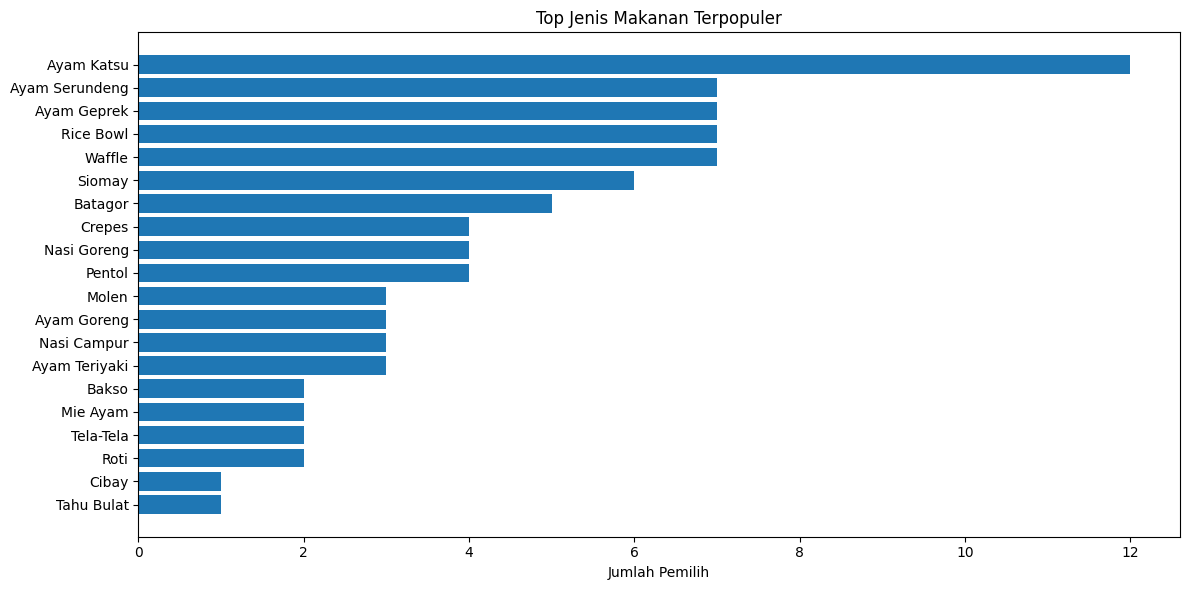


✅ Grafik disimpan: jenis_makanan_terpopuler.png


In [ ]:
# kode: jenis_makanan_populer_digabung.py
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------
# CONFIG
# ---------------------------
CSV_PATH = "/content/Preferensi_Makanan_Kantin.csv"
TOP_N = 20
OUTPUT_PNG = "jenis_makanan_terpopuler.png"

# ---------------------------
# LOAD DATA
# ---------------------------
df = pd.read_csv(CSV_PATH)

# Normalisasi nama kolom to ensure unique names for Jenis Makanan
# This list MUST match the 9 columns in the CSV
df.columns = [
    "Timestamp", "ProgramStudi", "Gender",
    "TipeMakanan", "JenisMakanan1", "Rasa1",
    "JenisMakanan2", "Rasa2", "Harga"
]

# Ensure consistent text formatting for categories
for col in ["TipeMakanan", "JenisMakanan1", "Rasa1", "JenisMakanan2", "Rasa2", "Harga"]:
    # Only process if the column exists to prevent error on initial run
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.title()
        # Convert 'Nan' string back to actual NaN if it occurred
        df[col] = df[col].replace('Nan', pd.NA) # Replace string 'Nan' with actual pd.NA

# Directly use the clean column names
col_jenis1 = "JenisMakanan1"
col_jenis2 = "JenisMakanan2"

# ---------------------------
# GABUNGKAN MAKANAN BERAT & RINGAN
# ---------------------------
jenis_list = []

for _, row in df.iterrows():
    # jenis makanan 1
    # Check if the column exists and the value is not NaN
    if pd.notna(row[col_jenis1]):
        val = str(row[col_jenis1]).strip().title()
        # Fix: Removed pd.NA from the list, as val is already a string and pd.NA is handled by pd.notna()
        if val not in ["", "Nan", "None"]:
            jenis_list.append(val)

    # jenis makanan 2
    # Check if the column exists and the value is not NaN
    if pd.notna(row[col_jenis2]):
        val = str(row[col_jenis2]).strip().title()
        # Fix: Removed pd.NA from the list, as val is already a string and pd.NA is handled by pd.notna()
        if val not in ["", "Nan", "None"]:
            jenis_list.append(val)

# Cek
if len(jenis_list) == 0:
    raise ValueError("Tidak ditemukan data jenis makanan!")

# ---------------------------
# HITUNG POPULARITAS
# ---------------------------
series = pd.Series(jenis_list)
summary = series.value_counts().reset_index()
summary.columns = ["JenisMakanan", "Jumlah"]

top_summary = summary.head(TOP_N)
print("\n=== TOP {} JENIS MAKANAN TERPOPULER (GABUNG BERAT + RINGAN) ===".format(TOP_N))
print(top_summary.to_string(index=False))

# ---------------------------
# VISUALISASI
# ---------------------------
plt.figure(figsize=(12, 6))
plt.barh(top_summary["JenisMakanan"][::-1], top_summary["Jumlah"][::-1])
plt.xlabel("Jumlah Pemilih")
plt.title("Top Jenis Makanan Terpopuler")
plt.tight_layout()
plt.savefig(OUTPUT_PNG, dpi=300)
plt.show()

print(f"\n✅ Grafik disimpan: {OUTPUT_PNG}")

In [ ]:
import pandas as pd

# Load data
df = pd.read_csv("/content/Preferensi_Makanan_Kantin.csv")

# Normalisasi nama kolom (replicate from earlier processing)
df.columns = [
    "Timestamp", "ProgramStudi", "Gender",
    "TipeMakanan", "JenisMakanan1", "Rasa1",
    "JenisMakanan2", "Rasa2", "Harga"
]

# Normalisasi teks kategori agar tidak duplikat
df["TipeMakanan"] = df["TipeMakanan"].str.strip().str.lower().str.title()

# Gabungkan input jenis makanan 1 & 2
df["JenisMakanan"] = df["JenisMakanan1"].combine_first(df["JenisMakanan2"])
df["RasaFavorit"] = df["Rasa1"].combine_first(df["Rasa2"])

# Crosstab
ct_gender_rasa = pd.crosstab(df["Gender"], df["RasaFavorit"])

# Ubah jadi tabel rekap (long format)
rekap_gender_rasa = ct_gender_rasa.reset_index().melt(
    id_vars="Gender",
    var_name="Rasa",
    value_name="Jumlah"
)

# Hanya tampilkan baris yang jumlahnya > 0
rekap_gender_rasa = rekap_gender_rasa[rekap_gender_rasa["Jumlah"] > 0]

# Urutkan dari yang paling banyak peminatnya
rekap_gender_rasa = rekap_gender_rasa.sort_values(by="Jumlah", ascending=False)

print("\n=== REKAP GENDER x RASA (URUT DARI PALING BANYAK) ===")
print(rekap_gender_rasa)



=== REKAP GENDER x RASA (URUT DARI PALING BANYAK) ===
        Gender                                         Rasa  Jumlah
49   Perempuan                                        Manis       8
17   Perempuan                                        Pedas       7
0    Laki-laki                                   Gurih/asin       7
7    Perempuan                                        Manis       6
1    Perempuan                                   Gurih/asin       4
16   Laki-laki                                        Pedas       4
18   Laki-laki                           Pedas,  Gurih/asin       3
59   Perempuan                            Pedas, Gurih/asin       3
54   Laki-laki                            Netral / original       3
45   Perempuan                                   Gurih/asin       3
65   Perempuan                     Pedas, Manis, Gurih/asin       3
37   Perempuan                     Pedas, Manis, Gurih/asin       2
22   Laki-laki                   Pedas,  Manis,  Gurih/asin  

In [ ]:
import pandas as pd

# Load data
df = pd.read_csv("/content/Preferensi_Makanan_Kantin.csv")

# Normalisasi nama kolom
df.columns = [
    "Timestamp", "ProgramStudi", "Gender",
    "TipeMakanan", "JenisMakanan1", "Rasa1",
    "JenisMakanan2", "Rasa2", "Harga"
]

# Normalisasi teks kategori agar konsisten
df["TipeMakanan"] = df["TipeMakanan"].str.strip().str.lower().str.title()

# Ambil semua kolom rasa dan gender
df_rasa1 = df[["Gender", "Rasa1"]].rename(columns={"Rasa1":"Rasa"})
df_rasa2 = df[["Gender", "Rasa2"]].rename(columns={"Rasa2":"Rasa"})

# Gabungkan kedua kolom rasa
df_long = pd.concat([df_rasa1, df_rasa2], ignore_index=True)

# Hapus NaN
df_long = df_long.dropna(subset=["Rasa"])

# **Split rasa yang digabung dengan koma** dan buat baris baru untuk tiap rasa
df_split = df_long.assign(Rasa=df_long["Rasa"].str.split(",")).explode("Rasa")

# Bersihkan spasi di tiap rasa
df_split["Rasa"] = df_split["Rasa"].str.strip()

# Hitung jumlah per Gender & Rasa (gabungkan duplikat)
rekap_gender_rasa = df_split.groupby(["Gender", "Rasa"], as_index=False).size().rename(columns={"size":"Jumlah"})

# Urutkan dari yang paling banyak peminatnya
rekap_gender_rasa = rekap_gender_rasa.sort_values(by="Jumlah", ascending=False)

# Tampilkan rapi tanpa index
print("\n=== REKAP GENDER x RASA ===")
print(rekap_gender_rasa.to_string(index=False))



=== REKAP GENDER x RASA ===
    Gender              Rasa  Jumlah
 Laki-laki        Gurih/asin      26
 Perempuan        Gurih/asin      25
 Perempuan             Manis      25
 Perempuan             Pedas      23
 Laki-laki             Pedas      19
 Laki-laki Netral / original       9
 Laki-laki             Manis       8
 Perempuan Netral / original       6
 Perempuan              Asam       6
 Laki-laki             Pahit       4
 Perempuan             Pahit       2
 Laki-laki              Asam       1


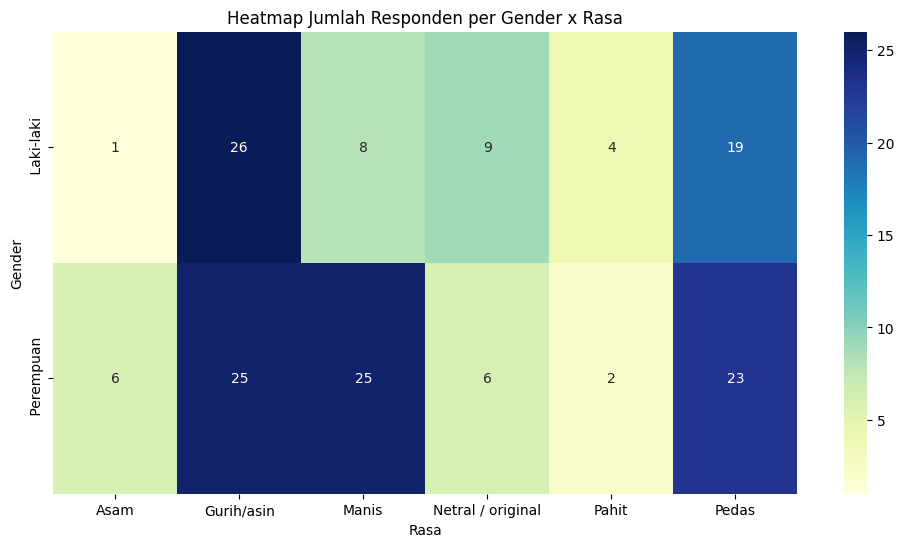

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# (Kode sebelumnya untuk rekap_gender_rasa tetap sama)
df = pd.read_csv("/content/Preferensi_Makanan_Kantin.csv")
df.columns = [
    "Timestamp", "ProgramStudi", "Gender",
    "TipeMakanan", "JenisMakanan1", "Rasa1",
    "JenisMakanan2", "Rasa2", "Harga"
]


df_rasa1 = df[["Gender", "Rasa1"]].rename(columns={"Rasa1":"Rasa"})
df_rasa2 = df[["Gender", "Rasa2"]].rename(columns={"Rasa2":"Rasa"})
df_long = pd.concat([df_rasa1, df_rasa2], ignore_index=True)
df_long = df_long.dropna(subset=["Rasa"])
df_split = df_long.assign(Rasa=df_long["Rasa"].str.split(",")).explode("Rasa")
df_split["Rasa"] = df_split["Rasa"].str.strip()
rekap_gender_rasa = df_split.groupby(["Gender", "Rasa"], as_index=False).size().rename(columns={"size":"Jumlah"})

# Pivot table untuk heatmap (Gender sebagai baris, Rasa sebagai kolom)
pivot = rekap_gender_rasa.pivot(index="Gender", columns="Rasa", values="Jumlah").fillna(0)

# Buat heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Heatmap Jumlah Responden per Gender x Rasa")
plt.ylabel("Gender")
plt.xlabel("Rasa")
plt.show()


In [ ]:
import pandas as pd

# Load data
df = pd.read_csv("/content/Preferensi_Makanan_Kantin.csv")

# Normalisasi nama kolom
df.columns = [
    "Timestamp", "ProgramStudi", "Gender",
    "TipeMakanan", "JenisMakanan1", "Rasa1",
    "JenisMakanan2", "Rasa2", "Harga"
]


# Normalisasi teks kategori agar konsisten
df["TipeMakanan"] = df["TipeMakanan"].str.strip().str.lower().str.title()

# Ambil semua kolom rasa dan Tipe Makanan (as intended for TipeMakanan x Rasa)
df_rasa1 = df[["TipeMakanan", "Rasa1"]].rename(columns={"Rasa1":"Rasa"})
df_rasa2 = df[["TipeMakanan", "Rasa2"]].rename(columns={"Rasa2":"Rasa"})

# Gabungkan kedua kolom rasa
df_long = pd.concat([df_rasa1, df_rasa2], ignore_index=True)

# Hapus NaN
df_long = df_long.dropna(subset=["Rasa"])

# **Split rasa yang digabung dengan koma** dan buat baris baru untuk tiap rasa
df_split = df_long.assign(Rasa=df_long["Rasa"].str.split(",")).explode("Rasa")

# Bersihkan spasi di tiap rasa
df_split["Rasa"] = df_split["Rasa"].str.strip()

# Hitung jumlah per TipeMakanan & Rasa (gabungkan duplikat)
rekap_tipe_rasa = df_split.groupby(["TipeMakanan", "Rasa"], as_index=False).size().rename(columns={"size":"Jumlah"})

# Urutkan dari yang paling banyak peminatnya
rekap_tipe_rasa = rekap_tipe_rasa.sort_values(by="Jumlah", ascending=False)

# Tampilkan rapi tanpa index
print("\n=== REKAP TipeMakanan x RASA ===")
print(rekap_tipe_rasa.to_string(index=False))


=== REKAP TipeMakanan x RASA ===
   TipeMakanan              Rasa  Jumlah
 Makanan Berat        Gurih/asin      30
 Makanan Berat             Pedas      25
Makanan Ringan             Manis      23
Makanan Ringan        Gurih/asin      21
Makanan Ringan             Pedas      17
 Makanan Berat Netral / original      11
 Makanan Berat             Manis      10
Makanan Ringan              Asam       4
Makanan Ringan Netral / original       4
 Makanan Berat             Pahit       4
 Makanan Berat              Asam       3
Makanan Ringan             Pahit       2


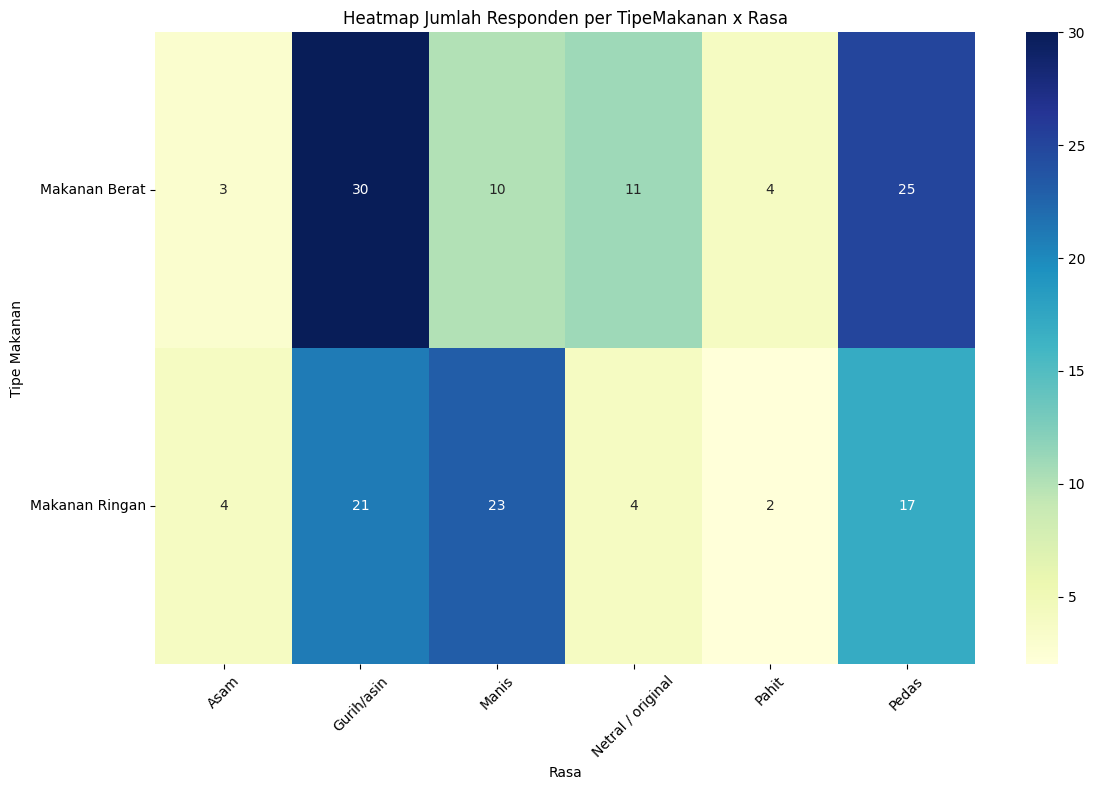

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data dan preprocessing (sama seperti kode kamu)
df = pd.read_csv("/content/Preferensi_Makanan_Kantin.csv")
df.columns = [
    "Timestamp", "ProgramStudi", "Gender",
    "TipeMakanan", "JenisMakanan1", "Rasa1",
    "JenisMakanan2", "Rasa2", "Harga"
]


df["TipeMakanan"] = df["TipeMakanan"].str.strip().str.lower().str.title()

df_rasa1 = df[["TipeMakanan", "Rasa1"]].rename(columns={"Rasa1":"Rasa"})
df_rasa2 = df[["TipeMakanan", "Rasa2"]].rename(columns={"Rasa2":"Rasa"})
df_long = pd.concat([df_rasa1, df_rasa2], ignore_index=True)
df_long = df_long.dropna(subset=["Rasa"])
df_split = df_long.assign(Rasa=df_long["Rasa"].str.split(",")).explode("Rasa")
df_split["Rasa"] = df_split["Rasa"].str.strip()

rekap_tipe_rasa = df_split.groupby(["TipeMakanan", "Rasa"], as_index=False)\
                          .size().rename(columns={"size":"Jumlah"})

# Pivot table untuk heatmap
pivot = rekap_tipe_rasa.pivot(index="TipeMakanan", columns="Rasa", values="Jumlah").fillna(0)

# Buat heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Heatmap Jumlah Responden per TipeMakanan x Rasa")
plt.ylabel("Tipe Makanan")
plt.xlabel("Rasa")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load data
df = pd.read_csv("/content/Preferensi_Makanan_Kantin.csv")

# Normalisasi nama kolom
df.columns = [
    "Timestamp", "ProgramStudi", "Gender",
    "TipeMakanan", "JenisMakanan1", "Rasa1",
    "JenisMakanan2", "Rasa2", "Harga"
]


# Normalisasi teks agar konsisten
df["JenisMakanan1"] = df["JenisMakanan1"].str.strip().str.title()
df["JenisMakanan2"] = df["JenisMakanan2"].str.strip().str.title()

# Gabungkan JenisMakanan1 & JenisMakanan2 menjadi satu kolom
df_jenis = pd.concat([
    df[["JenisMakanan1", "Rasa1"]].rename(columns={"JenisMakanan1":"JenisMakanan", "Rasa1":"Rasa"}),
    df[["JenisMakanan2", "Rasa2"]].rename(columns={"JenisMakanan2":"JenisMakanan", "Rasa2":"Rasa"})
], ignore_index=True)

# Hapus baris yang kosong
df_jenis = df_jenis.dropna(subset=["JenisMakanan", "Rasa"])

# Split jika ada beberapa rasa dalam satu sel, lalu explode
df_jenis_split = df_jenis.assign(Rasa=df_jenis["Rasa"].str.split(",")).explode("Rasa")

# Bersihkan spasi
df_jenis_split["Rasa"] = df_jenis_split["Rasa"].str.strip()

# Hitung jumlah per JenisMakanan & Rasa
rekap_jenis_rasa = df_jenis_split.groupby(["JenisMakanan", "Rasa"], as_index=False).size().rename(columns={"size":"Jumlah"})

# Urutkan dari yang paling banyak peminatnya
rekap_jenis_rasa = rekap_jenis_rasa.sort_values(by="Jumlah", ascending=False)

# Tampilkan hasil
print("\n=== REKAP JenisMakanan x RASA ===")
print(rekap_jenis_rasa.to_string(index=False))



=== REKAP JenisMakanan x RASA ===
  JenisMakanan              Rasa  Jumlah
    Ayam Katsu        Gurih/asin       9
        Waffle             Manis       7
   Ayam Geprek             Pedas       5
       Batagor        Gurih/asin       5
        Siomay        Gurih/asin       5
Ayam Serundeng        Gurih/asin       5
    Ayam Katsu Netral / original       4
    Ayam Katsu             Pedas       4
        Crepes             Manis       4
        Siomay             Pedas       4
         Molen             Manis       3
Ayam Serundeng             Pedas       3
   Ayam Geprek        Gurih/asin       3
        Pentol        Gurih/asin       3
        Pentol             Pedas       3
   Nasi Goreng        Gurih/asin       3
     Rice Bowl             Pedas       3
   Nasi Goreng             Pedas       3
     Rice Bowl        Gurih/asin       3
     Rice Bowl             Manis       3
     Tela-Tela             Pedas       2
   Nasi Campur             Pedas       2
 Ayam Teriyaki        

In [ ]:
import pandas as pd

# Load data
df = pd.read_csv("/content/Preferensi_Makanan_Kantin.csv")

# Normalisasi nama kolom
# Corrected to include 'Timestamp' as the first column
df.columns = [
    "Timestamp", "ProgramStudi", "Gender",
    "TipeMakanan", "JenisMakanan1", "Rasa1",
    "JenisMakanan2", "Rasa2", "Harga"
]

# Normalisasi teks kategori agar konsisten
df["TipeMakanan"] = df["TipeMakanan"].str.strip().str.title()
df["Harga"] = df["Harga"].astype(str).str.strip()  # pastikan harga string konsisten

# Crosstab TipeMakanan x Harga
ct_tipe_harga = pd.crosstab(df["TipeMakanan"], df["Harga"])

# Tambahkan total per TipeMakanan
ct_tipe_harga["Total"] = ct_tipe_harga.sum(axis=1)

# Tambahkan total per Harga
ct_tipe_harga.loc["Total"] = ct_tipe_harga.sum()

print("\n=== REKAP TipeMakanan x Harga ===")
print(ct_tipe_harga)


=== REKAP TipeMakanan x Harga ===
Harga           > Rp 20.000  Rp 10.001 – Rp 15.000  Rp 15.001 – Rp 20.000  \
TipeMakanan                                                                 
Makanan Berat             0                     25                     26   
Makanan Ringan            2                     10                      2   
Total                     2                     35                     28   

Harga           Rp 5.000 – Rp 10.000  Total  
TipeMakanan                                  
Makanan Berat                      0     51  
Makanan Ringan                    21     35  
Total                             21     86  


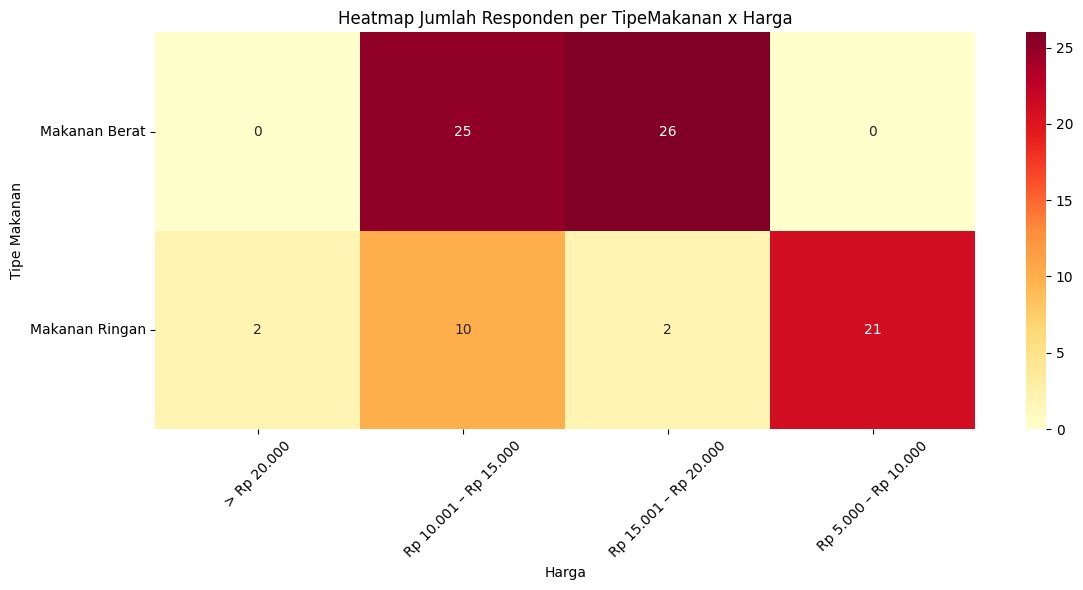

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data dan preprocessing
df = pd.read_csv("Preferensi_Makanan_Kantin.csv")
df.columns = ["Timestamp", "ProgramStudi", "Gender", "TipeMakanan",
              "JenisMakanan1", "Rasa1", "JenisMakanan2", "Rasa2", "Harga"]

df["TipeMakanan"] = df["TipeMakanan"].str.strip().str.title()
df["Harga"] = df["Harga"].astype(str).str.strip()

# Crosstab: jumlah responden per TipeMakanan x Harga
ct_tipe_harga = pd.crosstab(df["TipeMakanan"], df["Harga"])

# Pivot table untuk heatmap (hapus Total agar lebih rapi)
pivot = ct_tipe_harga.fillna(0)

# Buat heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlOrRd")
plt.title("Heatmap Jumlah Responden per TipeMakanan x Harga")
plt.ylabel("Tipe Makanan")
plt.xlabel("Harga")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load data
df = pd.read_csv('Preferensi_Makanan_Kantin.csv')

# Normalisasi nama kolom
df.columns = [
    "Timestamp", "ProgramStudi", "Gender",
    "TipeMakanan", "JenisMakanan1", "Rasa1",
    "JenisMakanan2", "Rasa2", "Harga"
]

# Normalisasi teks kategori agar konsisten
df["JenisMakanan"] = df["JenisMakanan1"].combine_first(df["JenisMakanan2"])

# Crosstab: jumlah responden per JenisMakanan x ProgramStudi
ct_jenis_program = pd.crosstab(df["JenisMakanan"], df["ProgramStudi"])

# Ubah ke long format untuk rekap rapi
rekap_jenis_program = ct_jenis_program.reset_index().melt(
    id_vars="JenisMakanan",
    var_name="ProgramStudi",
    value_name="JumlahResponden"
)

# Hanya tampilkan yang jumlahnya > 0
rekap_jenis_program = rekap_jenis_program[rekap_jenis_program["JumlahResponden"] > 0]

# Urutkan dari yang paling banyak
rekap_jenis_program = rekap_jenis_program.sort_values(by="JumlahResponden", ascending=False)

print("\n=== REKAP JENIS MAKANAN x PROGRAM STUDI (JUMLAH RESPONDEN) ===")
print(rekap_jenis_program.to_string(index=False))



=== REKAP JENIS MAKANAN x PROGRAM STUDI (JUMLAH RESPONDEN) ===
   JenisMakanan      ProgramStudi  JumlahResponden
 Ayam serundeng        Sains Data                6
         Waffle    Bisnis Digital                5
      Rice bowl    Bisnis Digital                5
     Ayam katsu       Informatika                4
    Ayam geprek       Informatika                4
        Batagor       Informatika                4
     Ayam katsu        Sains Data                4
         Siomay  Sistem Informasi                3
     Ayam katsu  Sistem Informasi                3
         Crepes    Bisnis Digital                2
         Waffle       Informatika                2
    Ayam geprek        Sains Data                2
          Molen        Sains Data                2
    Nasi goreng        Sains Data                2
  Ayam teriyaki  Sistem Informasi                2
    Ayam goreng  Sistem Informasi                2
          Bakso    Bisnis Digital                1
     Ayam katsu   

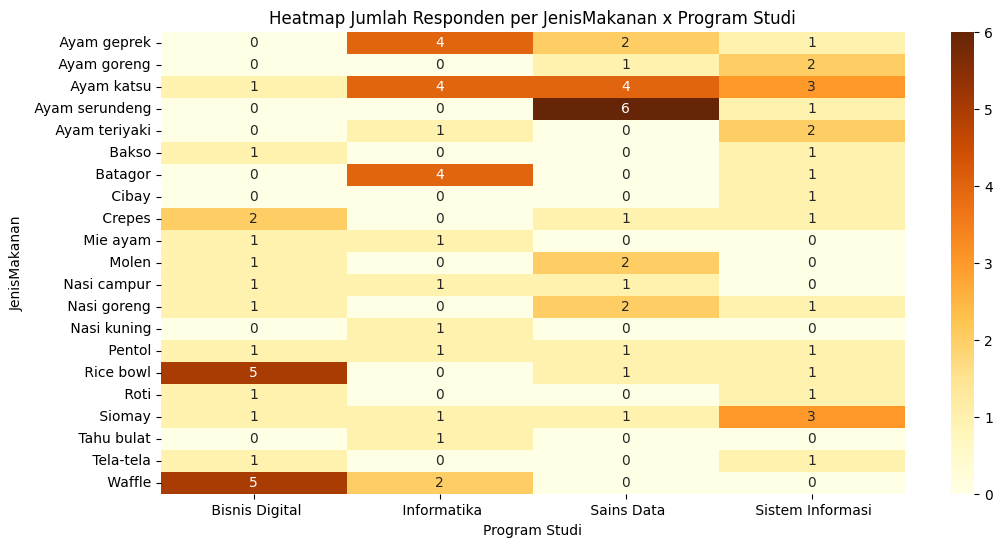

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data dan preprocessing
df = pd.read_csv('Preferensi_Makanan_Kantin.csv')
df.columns = ["Timestamp", "ProgramStudi", "Gender", "TipeMakanan",
              "JenisMakanan1", "Rasa1", "JenisMakanan2", "Rasa2", "Harga"]

# Gabungkan JenisMakanan1 & JenisMakanan2
df["JenisMakanan"] = df["JenisMakanan1"].combine_first(df["JenisMakanan2"])

# Crosstab: jumlah responden per JenisMakanan x ProgramStudi
ct_jenis_program = pd.crosstab(df["JenisMakanan"], df["ProgramStudi"])

# Pivot table (untuk heatmap)
pivot = ct_jenis_program.fillna(0)

# Buat heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlOrBr")
plt.title("Heatmap Jumlah Responden per JenisMakanan x Program Studi")
plt.ylabel("JenisMakanan")
plt.xlabel("Program Studi")
plt.show()


In [ ]:
import pandas as pd

# Load data
df = pd.read_csv('Preferensi_Makanan_Kantin.csv')

# Normalisasi nama kolom
df.columns = [
    "Timestamp", "ProgramStudi", "Gender",
    "TipeMakanan", "JenisMakanan1", "Rasa1",
    "JenisMakanan2", "Rasa2", "Harga"
]

# Normalisasi teks kategori agar konsisten
df["JenisMakanan"] = df["JenisMakanan1"].combine_first(df["JenisMakanan2"])

# Crosstab: jumlah responden per JenisMakanan x ProgramStudi
ct_jenis_program = pd.crosstab(df["JenisMakanan"], df["ProgramStudi"])

# Ubah ke long format untuk rekap rapi
rekap_jenis_program = ct_jenis_program.reset_index().melt(
    id_vars="JenisMakanan",
    var_name="ProgramStudi",
    value_name="JumlahResponden"
)

# Hanya tampilkan yang jumlahnya > 0
rekap_jenis_program = rekap_jenis_program[rekap_jenis_program["JumlahResponden"] > 0]

# Urutkan dari yang paling banyak
rekap_jenis_program = rekap_jenis_program.sort_values(by="JumlahResponden", ascending=False)

print("\n=== REKAP JENIS MAKANAN x PROGRAM STUDI (JUMLAH RESPONDEN) ===")
print(rekap_jenis_program.to_string(index=False))



=== REKAP JENIS MAKANAN x PROGRAM STUDI (JUMLAH RESPONDEN) ===
   JenisMakanan      ProgramStudi  JumlahResponden
 Ayam serundeng        Sains Data                6
         Waffle    Bisnis Digital                5
      Rice bowl    Bisnis Digital                5
     Ayam katsu       Informatika                4
    Ayam geprek       Informatika                4
        Batagor       Informatika                4
     Ayam katsu        Sains Data                4
         Siomay  Sistem Informasi                3
     Ayam katsu  Sistem Informasi                3
         Crepes    Bisnis Digital                2
         Waffle       Informatika                2
    Ayam geprek        Sains Data                2
          Molen        Sains Data                2
    Nasi goreng        Sains Data                2
  Ayam teriyaki  Sistem Informasi                2
    Ayam goreng  Sistem Informasi                2
          Bakso    Bisnis Digital                1
     Ayam katsu   

In [ ]:
# Crosstab
ct_jenis_rasa = pd.crosstab(df["JenisMakanan"], df["RasaFavorit"])

# Ubah ke long format
rekap_jenis_rasa = ct_jenis_rasa.reset_index().melt(
    id_vars="JenisMakanan",
    var_name="Rasa",
    value_name="Jumlah"
)

rekap_jenis_rasa = rekap_jenis_rasa[rekap_jenis_rasa["Jumlah"] > 0]

print("\n=== REKAP JENIS MAKANAN x RASA ===")
print(rekap_jenis_rasa)



=== REKAP JENIS MAKANAN x RASA ===
        JenisMakanan                      Rasa  Jumlah
1        Ayam goreng                Gurih/asin       1
2         Ayam katsu                Gurih/asin       5
3     Ayam serundeng                Gurih/asin       2
9           Mie ayam                Gurih/asin       1
11       Nasi campur                Gurih/asin       1
..               ...                       ...     ...
657          Batagor  Pedas, Gurih/asin, Pahit       1
679            Cibay  Pedas, Manis, Gurih/asin       1
686           Pentol  Pedas, Manis, Gurih/asin       1
691        Tela-tela  Pedas, Manis, Gurih/asin       1
692           Waffle  Pedas, Manis, Gurih/asin       1

[69 rows x 3 columns]


In [ ]:
# ========================================
# SECTION 3 — Analisis Relasi (tanpa gabung)
# ========================================

# Hitung frekuensi masing-masing kolom secara terpisah
summary_tipe = df["TipeMakanan"].value_counts()
summary_jenis1 = df["JenisMakanan1"].value_counts()
summary_jenis2 = df["JenisMakanan2"].value_counts()
summary_rasa1 = df["Rasa1"].value_counts()
summary_rasa2 = df["Rasa2"].value_counts()
summary_harga = df["Harga"].value_counts()

# Crosstab relasi antar variabel (memakai kolom asli)
ct_tipe_harga = pd.crosstab(df["TipeMakanan"], df["Harga"])
ct_jenis1_rasa1 = pd.crosstab(df["JenisMakanan1"], df["Rasa1"])
ct_jenis2_rasa2 = pd.crosstab(df["JenisMakanan2"], df["Rasa2"])
ct_gender_rasa1 = pd.crosstab(df["Gender"], df["Rasa1"])
ct_gender_rasa2 = pd.crosstab(df["Gender"], df["Rasa2"])

print("\n=== Crosstab Tipe Makanan x Harga ===")
print(ct_tipe_harga)

print("\n=== Crosstab Jenis Makanan 1 x Rasa 1 ===")
print(ct_jenis1_rasa1)

print("\n=== Crosstab Jenis Makanan 2 x Rasa 2 ===")
print(ct_jenis2_rasa2)

print("\n=== Crosstab Gender x Rasa 1 ===")
print(ct_gender_rasa1)

print("\n=== Crosstab Gender x Rasa 2 ===")
print(ct_gender_rasa2)



=== Crosstab Tipe Makanan x Harga ===
Harga            > Rp 20.000  Rp 10.001 – Rp 15.000  Rp 15.001 – Rp 20.000  \
TipeMakanan                                                                  
 Makanan berat             0                     25                     24   
 Makanan ringan            2                     10                      2   
Makanan berat              0                      0                      2   

Harga            Rp 5.000 – Rp 10.000  
TipeMakanan                            
 Makanan berat                      0  
 Makanan ringan                    21  
Makanan berat                       0  

=== Crosstab Jenis Makanan 1 x Rasa 1 ===
Rasa1            Gurih/asin   Gurih/asin,  Pahit  \
JenisMakanan1                                      
Ayam geprek               0                    0   
Ayam goreng               1                    0   
Ayam katsu                5                    0   
Ayam serundeng            2                    0   
Ayam teriyaki  

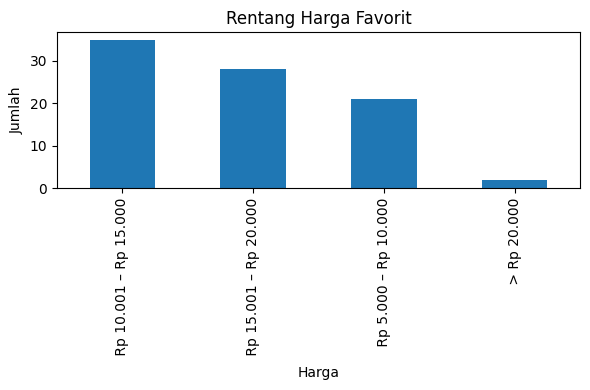

In [ ]:
# ========================================
# SECTION 4 — Visualisasi
# ========================================
import matplotlib.pyplot as plt


plt.figure(figsize=(6,4))
summary_harga.plot(kind='bar')
plt.title("Rentang Harga Favorit")
plt.xlabel("Harga")
plt.ylabel("Jumlah")
plt.tight_layout()
plt.show()

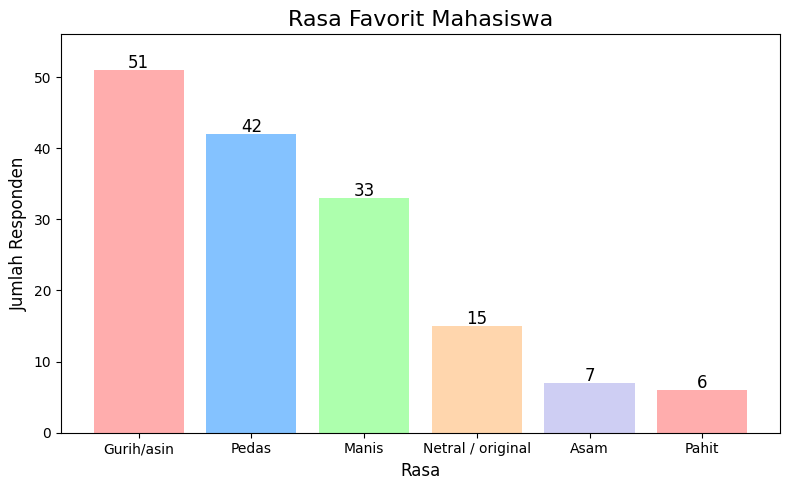

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data dan preprocessing rasa
df = pd.read_csv("Preferensi_Makanan_Kantin.csv")
df.columns = ["Timestamp", "ProgramStudi", "Gender", "TipeMakanan",
              "JenisMakanan1", "Rasa1", "JenisMakanan2", "Rasa2", "Harga"]

# Ambil semua kolom rasa
df_rasa1 = df[["Rasa1"]].rename(columns={"Rasa1":"Rasa"})
df_rasa2 = df[["Rasa2"]].rename(columns={"Rasa2":"Rasa"})
df_long = pd.concat([df_rasa1, df_rasa2], ignore_index=True)

# Hapus NaN dan split jika ada lebih dari satu rasa
df_long = df_long.dropna(subset=["Rasa"])
df_split = df_long.assign(Rasa=df_long["Rasa"].str.split(",")).explode("Rasa")
df_split["Rasa"] = df_split["Rasa"].str.strip()

# Hitung jumlah per rasa
summary_rasa = df_split['Rasa'].value_counts().sort_values(ascending=False)

# Visualisasi bar chart
plt.figure(figsize=(8,5))
bars = plt.bar(summary_rasa.index, summary_rasa.values, color=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'], alpha=0.8)

# Tambahkan jumlah di atas bar
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3, f"{summary_rasa.values[i]}",
             ha='center', fontsize=12)

plt.title("Rasa Favorit Mahasiswa", fontsize=16)
plt.xlabel("Rasa", fontsize=12)
plt.ylabel("Jumlah Responden", fontsize=12)
plt.ylim(0, summary_rasa.max() + 5)
plt.tight_layout()
plt.show()


In [ ]:
# ========================================
# RELASI PROGRAM STUDI x RENTANG HARGA
# ========================================

import pandas as pd

# Load data
df = pd.read_csv("Preferensi_Makanan_Kantin.csv")

# Normalisasi kolom agar aman dipakai
df.columns = [
    "Timestamp", "ProgramStudi", "Gender",
    "TipeMakanan", "JenisMakanan1", "Rasa1",
    "JenisMakanan2", "Rasa2", "Harga"
]

# Normalisasi teks
df["ProgramStudi"] = df["ProgramStudi"].astype(str).str.strip().str.title()
df["Harga"] = df["Harga"].astype(str).str.strip()

# === 1. Buat Crosstab (Relasi)
ct_prodi_harga = pd.crosstab(df["ProgramStudi"], df["Harga"])

print("\n=== PROGRAM STUDI x RENTANG HARGA ===")
print(ct_prodi_harga)

# === 2. Rekap per Program Studi (baris)
rekap_per_prodi = ct_prodi_harga.sum(axis=1)

print("\n=== TOTAL PER PROGRAM STUDI ===")
print(rekap_per_prodi)




=== PROGRAM STUDI x RENTANG HARGA ===
Harga             > Rp 20.000  Rp 10.001 – Rp 15.000  Rp 15.001 – Rp 20.000  \
ProgramStudi                                                                  
Bisnis Digital              0                      8                      6   
Informatika                 1                      9                      4   
Sains Data                  1                      8                     11   
Sistem Informasi            0                     10                      7   

Harga             Rp 5.000 – Rp 10.000  
ProgramStudi                            
Bisnis Digital                       8  
Informatika                          7  
Sains Data                           2  
Sistem Informasi                     4  

=== TOTAL PER PROGRAM STUDI ===
ProgramStudi
Bisnis Digital      22
Informatika         21
Sains Data          22
Sistem Informasi    21
dtype: int64


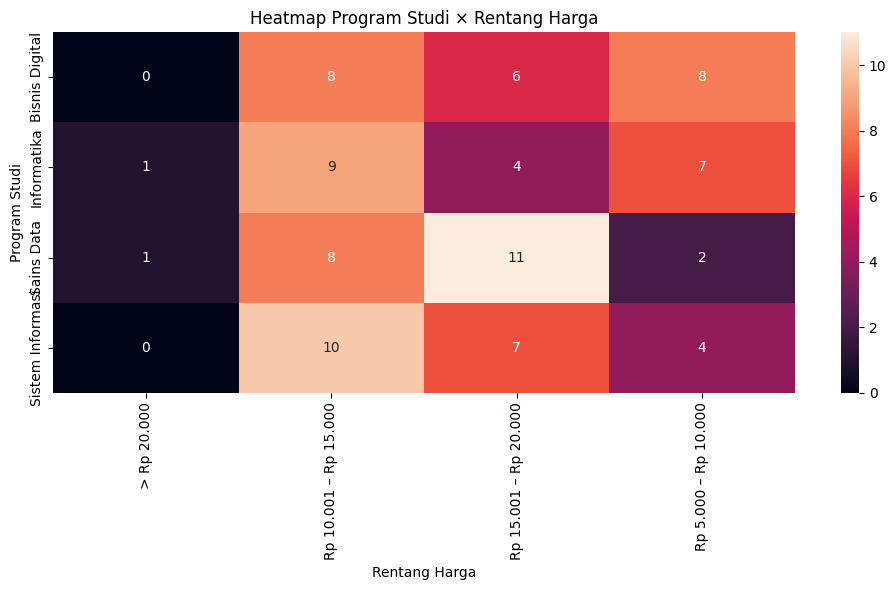

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ========================================
# LOAD DATA
# ========================================
df = pd.read_csv("Preferensi_Makanan_Kantin.csv")

# Normalisasi nama kolom agar rapi
df.columns = [
    "Timestamp", "ProgramStudi", "Gender",
    "TipeMakanan", "JenisMakanan1", "Rasa1",
    "JenisMakanan2", "Rasa2", "Harga"
]

# Normalisasi isi kolom
df["ProgramStudi"] = df["ProgramStudi"].astype(str).str.strip().str.title()
df["Harga"] = df["Harga"].astype(str).str.strip()

# ========================================
# CROSSTAB PROGRAM STUDI × RENTANG HARGA
# ========================================
ct_prodi_harga = pd.crosstab(df["ProgramStudi"], df["Harga"])

# ========================================
# VISUALISASI HEATMAP
# ========================================
plt.figure(figsize=(10, 6))
sns.heatmap(ct_prodi_harga, annot=True, fmt="d")

plt.title("Heatmap Program Studi × Rentang Harga")
plt.xlabel("Rentang Harga")
plt.ylabel("Program Studi")

plt.tight_layout()
plt.show()


#LOGIKA

In [ ]:
# === SECTION 1: Load Data ===
import pandas as pd

# Load CSV
path = '/content/Preferensi_Makanan_Kantin.csv'
df = pd.read_csv(path)

# Normalisasi kolom
df.columns = [
    "Timestamp", "ProgramStudi", "Gender",
    "TipeMakanan", "JenisMakanan1", "Rasa1",
    "JenisMakanan2", "Rasa2", "Harga"
]

# Normalisasi isi kategori
for col in ["TipeMakanan", "JenisMakanan1", "JenisMakanan2", "Rasa1", "Rasa2"]:
    df[col] = df[col].astype(str).str.strip().str.lower().str.title()

# Gabungkan jenis makanan & rasa
# (Jika JenisMakanan1 kosong, pakai JenisMakanan2)
df["JenisMakanan"] = df["JenisMakanan1"].combine_first(df["JenisMakanan2"])
df["RasaFavorit"] = df["Rasa1"].combine_first(df["Rasa2"])


In [ ]:
# === SECTION 2: Summary Tabel (Sederhana dan Jelas) ===
summary_tipe = df["TipeMakanan"].value_counts().reset_index()
summary_tipe.columns = ["TipeMakanan", "Jumlah"]

summary_jenis = df["JenisMakanan"].value_counts().reset_index()
summary_jenis.columns = ["JenisMakanan", "Jumlah"]

summary_rasa = df["RasaFavorit"].value_counts().reset_index()
summary_rasa.columns = ["Rasa", "Jumlah"]

summary_harga = df["Harga"].value_counts().reset_index()
summary_harga.columns = ["RentangHarga", "Jumlah"]

print("SUMMARY TIPE MAKANAN:\n", summary_tipe, "\n")
print("SUMMARY JENIS MAKANAN:\n", summary_jenis, "\n")
print("SUMMARY RASA:\n", summary_rasa, "\n")
print("SUMMARY HARGA:\n", summary_harga, "\n")


SUMMARY TIPE MAKANAN:
       TipeMakanan  Jumlah
0   Makanan Berat      51
1  Makanan Ringan      35 

SUMMARY JENIS MAKANAN:
       JenisMakanan  Jumlah
0              Nan      35
1       Ayam Katsu      12
2   Ayam Serundeng       7
3      Ayam Geprek       7
4        Rice Bowl       7
5      Nasi Goreng       4
6      Ayam Goreng       3
7      Nasi Campur       3
8    Ayam Teriyaki       3
9         Mie Ayam       2
10           Bakso       2
11     Nasi Kuning       1 

SUMMARY RASA:
                                           Rasa  Jumlah
0                                          Nan      35
1                                        Pedas      11
2                                   Gurih/Asin      11
3                Gurih/Asin, Netral / Original       5
4                           Pedas,  Gurih/Asin       4
5                                        Manis       3
6                            Netral / Original       3
7                   Pedas,  Manis,  Gurih/Asin       2
8         

In [ ]:
 # === SECTION 3: Logika Matematika Diskrit ===
# Kita bentuk pernyataan logika dasar dari data

# Contoh proposisi dasar:
# P: "Responden memilih Makanan Berat"
# Q: "Responden memilih Rasa Pedas"
# R: "Responden memilih harga 10k-15k"

# Contoh evaluasi proposisi per responden
logic_df = pd.DataFrame()
logic_df["P_MakananBerat"] = df["TipeMakanan"].apply(lambda x: x == "Makanan Berat")
logic_df["Q_RasaPedas"] = df["RasaFavorit"].apply(lambda x: x == "Pedas")
logic_df["R_Harga10_15"] = df["Harga"].apply(lambda x: str(x).strip() == "10k-15k")

# Contoh logika majemuk:
# (P ∧ Q): Responden memilih makanan berat DAN rasa pedas
logic_df["P_dan_Q"] = logic_df["P_MakananBerat"] & logic_df["Q_RasaPedas"]

# (P → Q): Jika memilih makanan berat maka memilih rasa pedas
# definisi implikasi: (not P) or Q
logic_df["P_implies_Q"] = (~logic_df["P_MakananBerat"]) | logic_df["Q_RasaPedas"]

# (Q ↔ R): memilih rasa pedas ↔ harga 10k-15k
logic_df["Q_equiv_R"] = logic_df["Q_RasaPedas"] == logic_df["R_Harga10_15"]

print("LOGIKA DISKRIT (Tabel):\n", logic_df.head())


LOGIKA DISKRIT (Tabel):
    P_MakananBerat  Q_RasaPedas  R_Harga10_15  P_dan_Q  P_implies_Q  Q_equiv_R
0            True        False         False    False        False       True
1            True        False         False    False        False       True
2            True         True         False     True         True      False
3           False        False         False    False         True       True
4           False        False         False    False         True       True


In [ ]:
# === Load & bersihkan data, lalu gabungkan semua pilihan jenis makanan ===
import pandas as pd

path = 'Preferensi_Makanan_Kantin.csv'
df = pd.read_csv(path)

# Pastikan nama kolom konsisten (ubah sesuai header file)
df.columns = [
    "Timestamp", "ProgramStudi", "Gender",
    "TipeMakanan", "JenisMakanan1", "Rasa1",
    "JenisMakanan2", "Rasa2", "Harga"
]

# Trim dan normalisasi teks (tanpa mengubah NaN jadi 'nan')
for col in ["TipeMakanan", "JenisMakanan1", "Rasa1", "JenisMakanan2", "Rasa2", "Harga"]:
    # jika kolom tidak ada/ berbeda, skip
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()
        # ubah string 'nan' yang kadang muncul jadi actual NaN
        df[col] = df[col].replace({'nan': None, '': None})
        # normalisasi kapitalisasi (jika bukan None)
        df[col] = df[col].where(df[col].isna(), df[col].str.lower().str.title())

# Gabungkan pilihan jenis makanan menjadi baris terpisah (explode)
rows = []
for idx, r in df.iterrows():
    # ambil semua jenis yang ada (1 dan 2)
    choices = []
    if pd.notna(r.get("JenisMakanan1")):
        choices.append(r["JenisMakanan1"])
    if pd.notna(r.get("JenisMakanan2")):
        choices.append(r["JenisMakanan2"])
    # jika tidak memilih sama sekali, beri label "Tidak Mengisi"
    if len(choices) == 0:
        rows.append({
            "Respondent": idx,
            "TipeMakanan": r.get("TipeMakanan") or "—",
            "JenisMakanan": "Tidak Mengisi",
            "RasaFavorit": r.get("Rasa1") or r.get("Rasa2") or "—",
            "Harga": r.get("Harga") or "—",
            "Gender": r.get("Gender") or "—",
            "ProgramStudi": r.get("ProgramStudi") or "—"
        })
    else:
        for j in choices:
            rows.append({
                "Respondent": idx,
                "TipeMakanan": r.get("TipeMakanan") or "—",
                "JenisMakanan": j,
                "RasaFavorit": r.get("Rasa1") or r.get("Rasa2") or "—",
                "Harga": r.get("Harga") or "—",
                "Gender": r.get("Gender") or "—",
                "ProgramStudi": r.get("ProgramStudi") or "—"
            })

df_exploded = pd.DataFrame(rows)

# === Summary yang kamu mau ===

# 1) Summary tipe makanan (original per-respondent)
summary_tipe = df["TipeMakanan"].fillna("—").value_counts().reset_index()
summary_tipe.columns = ["TipeMakanan", "Jumlah"]

# 2) Summary jenis makanan -> dari df_exploded (menghitung tiap pilihan)
summary_jenis_overall = df_exploded["JenisMakanan"].value_counts().reset_index()
summary_jenis_overall.columns = ["JenisMakanan", "Jumlah"]

# 3) Summary jenis makanan per tipe (pivot/ grup)
summary_jenis_by_tipe = df_exploded.groupby(["TipeMakanan", "JenisMakanan"]) \
                                   .size() \
                                   .reset_index(name="Jumlah") \
                                   .sort_values(["TipeMakanan", "Jumlah"], ascending=[True, False])

# 4) Summary rasa (gabungan preferensi final)
# gunakan kombinasi Rasa1/Rasa2 per responden (ambil yang ada)
df["RasaFavorit"] = df["Rasa1"].combine_first(df["Rasa2"])
summary_rasa = df["RasaFavorit"].fillna("—").value_counts().reset_index()
summary_rasa.columns = ["Rasa", "Jumlah"]

# 5) Summary harga (original)
summary_harga = df["Harga"].fillna("—").value_counts().reset_index()
summary_harga.columns = ["RentangHarga", "Jumlah"]

# === Tampilkan hasil ===
print("SUMMARY TIPE MAKANAN:\n", summary_tipe.to_string(index=False), "\n")
print("SUMMARY JENIS MAKANAN (Overall, termasuk pilihan dari Tipe Ringan & Berat):\n", summary_jenis_overall.to_string(index=False), "\n")
print("SUMMARY JENIS MAKANAN PER TIPE (TipeMakanan, JenisMakanan, Jumlah):\n", summary_jenis_by_tipe.to_string(index=False), "\n")
print("SUMMARY RASA:\n", summary_rasa.to_string(index=False), "\n")
print("SUMMARY HARGA:\n", summary_harga.to_string(index=False), "\n")

# Jika mau disimpan ke CSV:
# summary_jenis_overall.to_csv('summary_jenis_overall.csv', index=False)
# summary_jenis_by_tipe.to_csv('summary_jenis_by_tipe.csv', index=False)


SUMMARY TIPE MAKANAN:
    TipeMakanan  Jumlah
 Makanan Berat      51
Makanan Ringan      35 

SUMMARY JENIS MAKANAN (Overall, termasuk pilihan dari Tipe Ringan & Berat):
   JenisMakanan  Jumlah
    Ayam Katsu      12
Ayam Serundeng       7
   Ayam Geprek       7
     Rice Bowl       7
        Waffle       7
        Siomay       6
       Batagor       5
        Crepes       4
   Nasi Goreng       4
        Pentol       4
         Molen       3
   Ayam Goreng       3
   Nasi Campur       3
 Ayam Teriyaki       3
         Bakso       2
      Mie Ayam       2
     Tela-Tela       2
          Roti       2
         Cibay       1
    Tahu Bulat       1
   Nasi Kuning       1 

SUMMARY JENIS MAKANAN PER TIPE (TipeMakanan, JenisMakanan, Jumlah):
    TipeMakanan   JenisMakanan  Jumlah
 Makanan Berat     Ayam Katsu      12
 Makanan Berat    Ayam Geprek       7
 Makanan Berat Ayam Serundeng       7
 Makanan Berat      Rice Bowl       7
 Makanan Berat    Nasi Goreng       4
 Makanan Berat    Ayam G

Jika seorang mahasiswa membeli makanan di kantin, maka kemungkinan terbesar ia akan memilih makanan berat.
Jika ia memilih makanan berat, maka jenis yang paling mungkin dipilih adalah Ayam Katsu, Ayam Geprek, Ayam Serundeng, atau Rice Bowl.
Jika ia memilih salah satu jenis makanan tersebut, maka rasa yang paling mungkin ia sukai adalah gurih/asin atau manis, dengan kecenderungan paling kuat pada rasa gurih/asin.
Jika ia memilih rasa yang ia sukai, maka rentang harga yang paling mungkin ia bayar berkisar antara Rp 10.000 – Rp 20.000, dengan pilihan terbanyak pada Rp 10.001 – Rp 15.000.



Jika mahasiswa membeli makanan → besar kemungkinan makanan berat → besar kemungkinan berbahan ayam → besar kemungkinan rasa gurih/asin → besar kemungkinan harga 10k–15k.

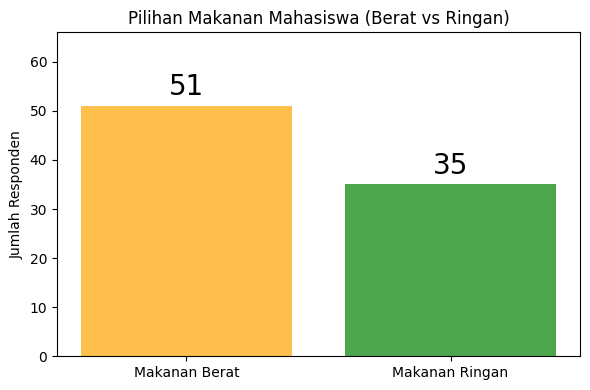

In [ ]:
import matplotlib.pyplot as plt

# Data
kategori = ['Makanan Berat', 'Makanan Ringan']
jumlah = [51, 35]

# Buat figure
plt.figure(figsize=(6,4))

# Plot jumlah sebagai bar chart
bars = plt.bar(kategori, jumlah, color=['orange', 'green'], alpha=0.7)

# Tambahkan ikon di atas bar
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, s=str(jumlah[i]),
             fontsize=20, ha='center', va='bottom')

# Label & judul
plt.ylabel('Jumlah Responden')
plt.title('Pilihan Makanan Mahasiswa (Berat vs Ringan)')
plt.ylim(0, max(jumlah)+15)
plt.tight_layout()
plt.show()

#GRAF

**Graf Program Studi dan Tipe Makanan**

Apa tipe makanan yang sering kamu beli?🍱,Makanan Berat,Makanan Ringan
Program Studi 🎓📘,,
Informatika,12,9
Bisnis Digital,10,12
Sains Data,17,5
Sistem Informasi,12,9


/tmp/ipython-input-1958933241.py:94: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(


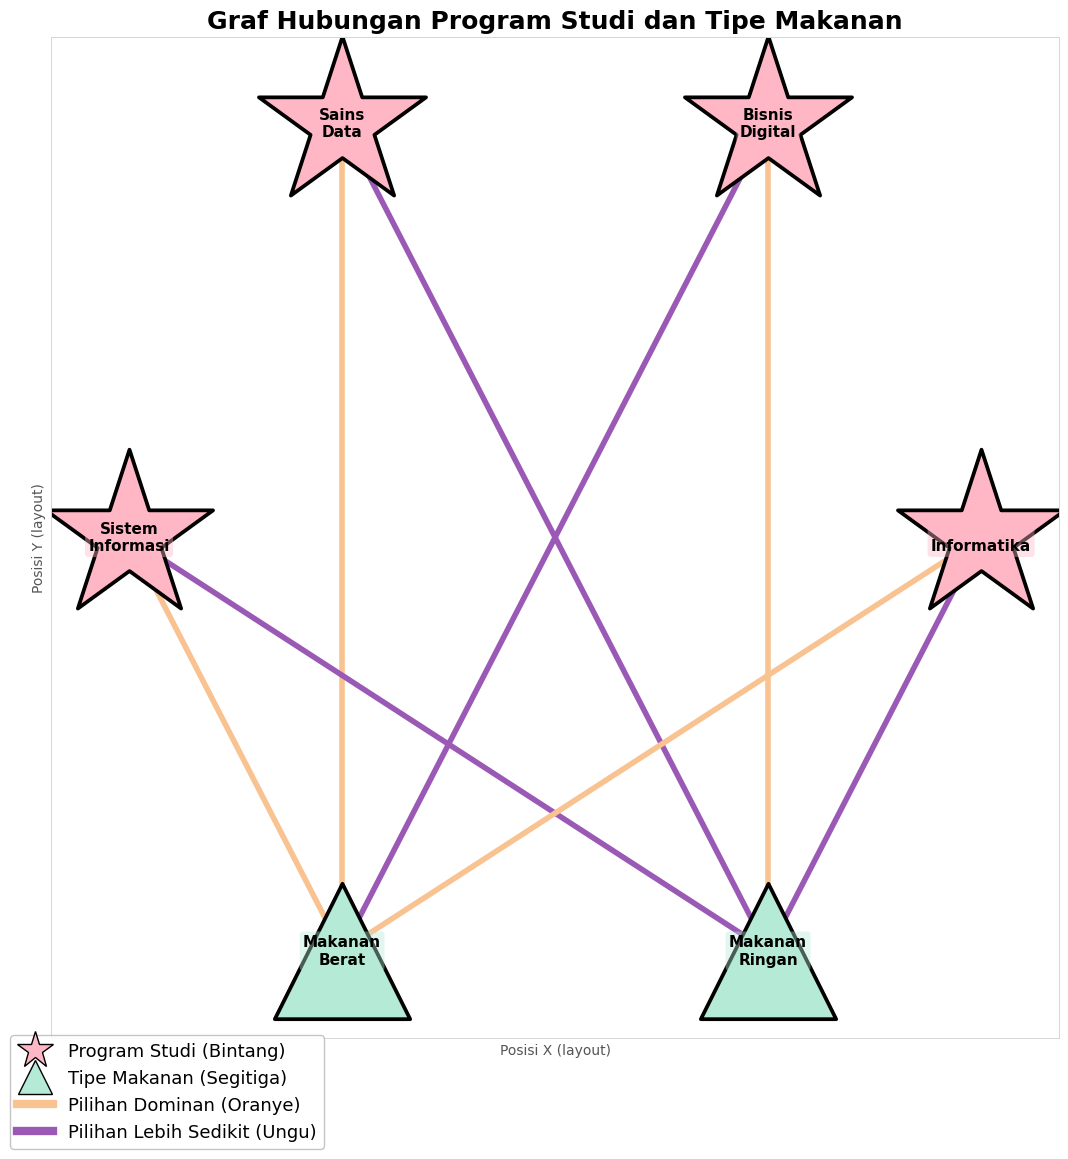

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import unicodedata
from matplotlib.lines import Line2D
from IPython.display import display

df = pd.read_csv("Preferensi_Makanan_Kantin_UPN_clean.csv")
df.columns = [c.strip() for c in df.columns]

prodi_col = "Program Studi  🎓📘"
tipe_col  = "Apa tipe makanan yang sering kamu beli?🍱"

df[prodi_col] = df[prodi_col].apply(lambda x: unicodedata.normalize("NFKD", str(x)).encode("ascii", "ignore").decode())
df[tipe_col]  = df[tipe_col].astype(str).str.strip()

summary = df.groupby([prodi_col, tipe_col]).size().unstack(fill_value=0)
summary = summary.rename(columns={
    "Makanan berat": "Makanan Berat",
    "Makanan ringan": "Makanan Ringan"
})

styled_table = (
    summary
    .style
    .set_properties(**{
        'border': '1px solid #999',
        'padding': '6px'
    })
    .set_table_styles([
        {'selector': 'th',
         'props': [('background-color', '#F7F1E3'),
                   ('color', '#2d2d2d'),
                   ('border', '1px solid #999'),
                   ('padding', '6px'),
                   ('font-weight', 'bold')]}
    ])
    .set_caption("Tabel Preferensi Tipe Makanan Berdasarkan Program Studi")
)

display(styled_table)

pairs = df[[prodi_col, tipe_col]].dropna().drop_duplicates()
relasi = list(pairs.itertuples(index=False, name=None))

prodi_original = summary.index.tolist()

WARNA_DOMINAN = "#F8C291"
WARNA_KECIL   = "#9B59B6"

edge_colors = {}

for prodi in prodi_original:
    berat  = summary.loc[prodi, "Makanan Berat"]
    ringan = summary.loc[prodi, "Makanan Ringan"]

    if berat > ringan:
        edge_colors[(prodi, "Makanan berat")] = WARNA_DOMINAN
        edge_colors[(prodi, "Makanan ringan")] = WARNA_KECIL
    elif ringan > berat:
        edge_colors[(prodi, "Makanan ringan")] = WARNA_DOMINAN
        edge_colors[(prodi, "Makanan berat")] = WARNA_KECIL
    else:
        edge_colors[(prodi, "Makanan berat")]  = WARNA_KECIL
        edge_colors[(prodi, "Makanan ringan")] = WARNA_KECIL

tipe_label = {
    "Makanan berat": "Makanan\nBerat",
    "Makanan ringan": "Makanan\nRingan"
}

G = nx.Graph()
G.add_nodes_from(prodi_original, shape="*", color="#FFB7C5")
G.add_nodes_from(["Makanan berat", "Makanan ringan"], shape="^", color="#B5EAD7")
G.add_edges_from([(a, b) for (a, b) in relasi])

angles = np.linspace(0, 2*np.pi, len(G.nodes), endpoint=False)
pos = {node: (np.cos(a), np.sin(a)) for node, a in zip(G.nodes, angles)}

plt.figure(figsize=(13,13))

for node in G.nodes:
    size = 16000 if node in prodi_original else 9500
    nx.draw_networkx_nodes(
        G, pos, nodelist=[node],
        node_color=G.nodes[node]["color"],
        node_shape=G.nodes[node]["shape"],
        node_size=size, edgecolors="black", linewidths=2.7
    )

for a, b in relasi:
    color = edge_colors.get((a, b), WARNA_KECIL)
    nx.draw_networkx_edges(
        G, pos, edgelist=[(a, b)],
        width=4,
        edge_color=color,
        connectionstyle="arc3, rad=0.22"
    )

for node, (x, y) in pos.items():

    if node in prodi_original:
        label = node.replace(" ", "\n", 1)
        bg = "#FFB7C5"
    else:
        label = tipe_label[node]
        bg = "#B5EAD7"

    plt.text(
        x, y, label,
        fontsize=11, fontweight="bold",
        ha='center', va='center',
        bbox=dict(facecolor=bg, edgecolor='none',
                  boxstyle='round,pad=0.22', alpha=0.40)
    )

plt.axis("on")
ax = plt.gca()

for side in ["bottom", "left", "top", "right"]:
    ax.spines[side].set_color("#D5D5D5")
    ax.spines[side].set_linewidth(0.7)

plt.xlabel("Posisi X (layout)", fontsize=10, color="#555")
plt.ylabel("Posisi Y (layout)", fontsize=10, color="#555")

plt.xticks(fontsize=8, color="#777")
plt.yticks(fontsize=8, color="#777")

legend_elements = [
    Line2D([0], [0], marker='*', color='w',
           label='Program Studi (Bintang)',
           markerfacecolor="#FFB7C5", markersize=28, markeredgecolor='black'),

    Line2D([0], [0], marker='^', color='w',
           label='Tipe Makanan (Segitiga)',
           markerfacecolor="#B5EAD7", markersize=24, markeredgecolor='black'),

    Line2D([0], [0], color=WARNA_DOMINAN, lw=6,
           label='Pilihan Dominan (Oranye)'),

    Line2D([0], [0], color=WARNA_KECIL, lw=6,
           label='Pilihan Lebih Sedikit (Ungu)')
]

plt.legend(
    handles=legend_elements,
    loc="lower left",
    bbox_to_anchor=(-0.05, -0.12),
    frameon=True,
    fontsize=13,
    facecolor="white",
    edgecolor="#BBBBBB",
    framealpha=0.85
)

plt.title("Graf Hubungan Program Studi dan Tipe Makanan",
          fontsize=18, fontweight="bold")

plt.show()

Graf diatas menggambarkan hubungan antara program studi mahasiswa dan tipe makanan. Node berbentuk bintang mewakili empat prodi yaitu Sains Data, Sistem Informasi, Bisnis Digital, dan Informatika. Sementara node berbentuk segitiga mewakili dua kategori tipe makanan, yaitu makanan berat dan makanan ringan. Garis penghubung (edge) menunjukkan preferensi dari setiap program studi dan warna garis menunjukkan tingkat dominasi pilihan, warna oranye dipakai untuk tipe makanan yang paling banyak dipilih, sedangkan warna ungu menunjukkan pilihan yang lebih sedikit.

Berdasarkan hasil graf, setiap prodi memiliki pilihan terhadap makanan ringan maupun makanan berat, namun kecenderungan utama dapat dilihat dari warna garis penghubung. Mahasiswa Sains Data, Sistem Informasi, dan Informatika paling banyak memilih makanan berat, sedangkan mahasiswa Bisnis Digital lebih sering memilih makanan ringan.

**Graf Hubungan Gender dan Tipe Makanan**

Tipe_Makanan,Makanan Berat,Makanan Ringan
Gender,,
Laki-laki,26,10
Perempuan,25,25


/tmp/ipython-input-7586119.py:94: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(


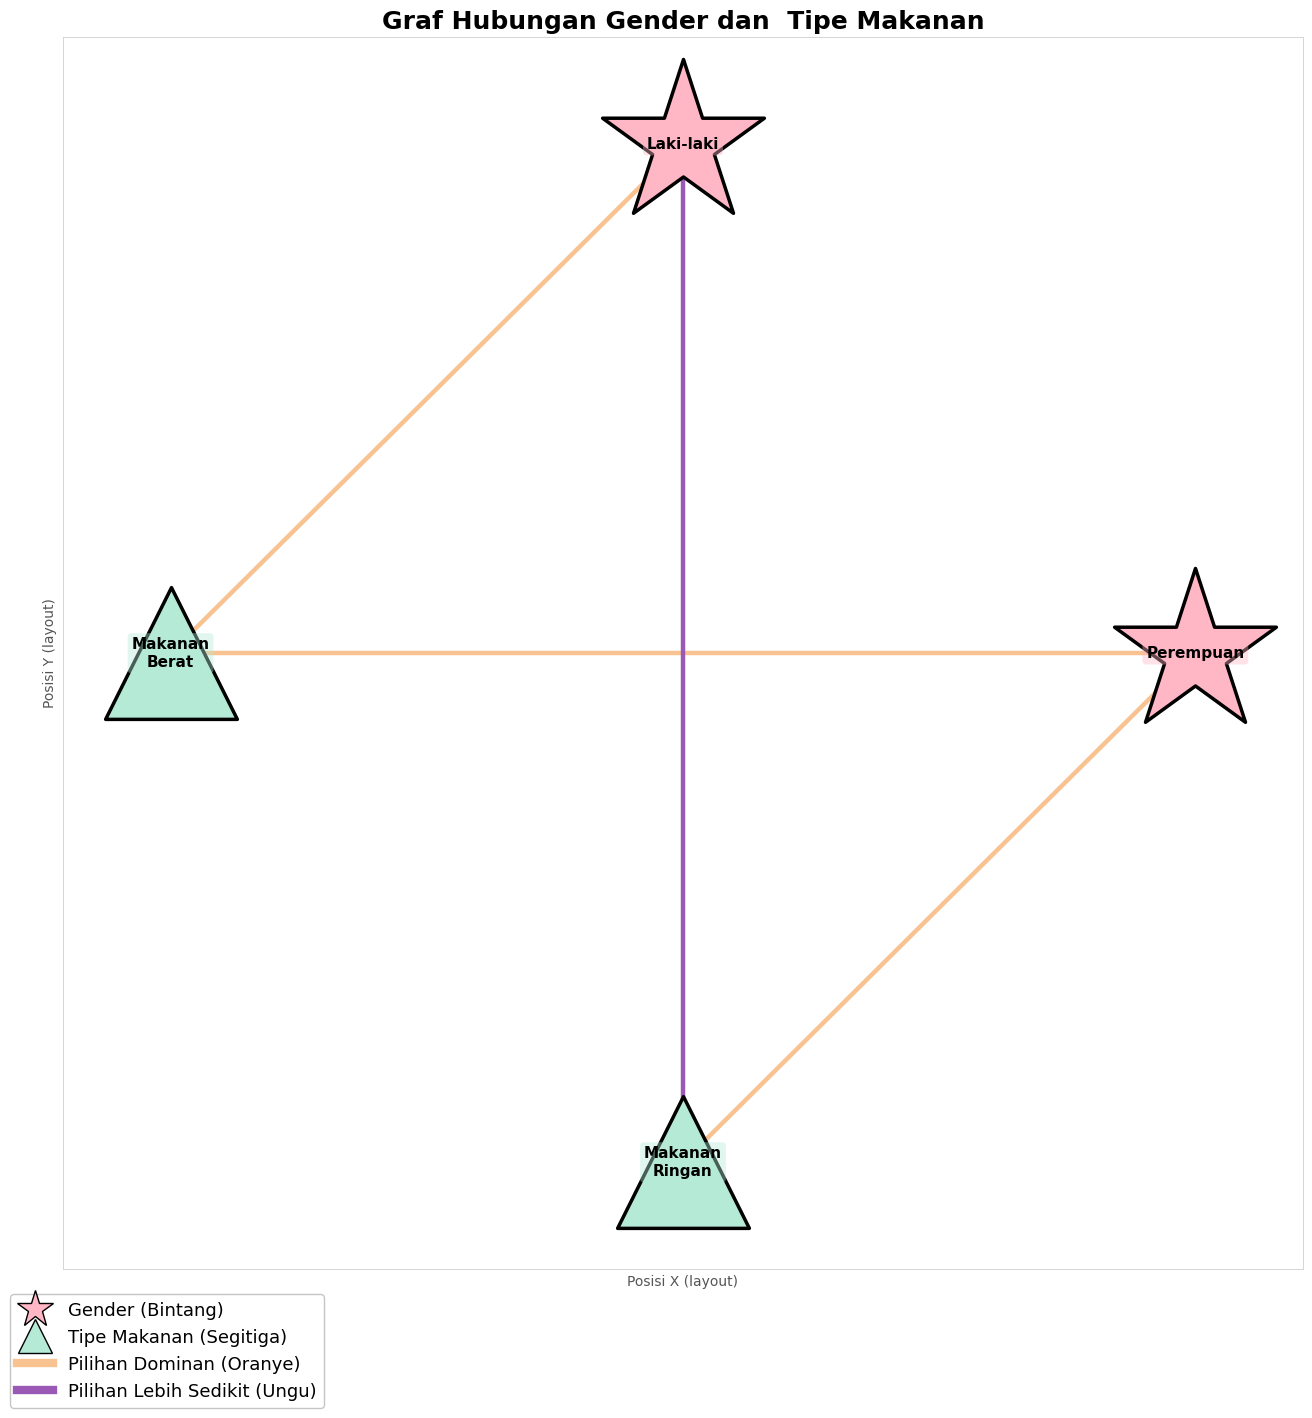

In [ ]:
df = pd.read_csv("Preferensi_Makanan_Kantin_UPN_clean.csv")
df.columns = [c.strip() for c in df.columns]

for col in df.columns:
    df[col] = df[col].astype(str).str.strip()

df["Tipe_Makanan"] = df["Apa tipe makanan yang sering kamu beli?🍱"]

tipe_label = {
    "Makanan berat": "Makanan\nBerat",
    "Makanan ringan": "Makanan\nRingan"
}

freq = {}
for _, row in df.iterrows():
    g = row["Gender"]
    t = row["Tipe_Makanan"]
    freq[(g, t)] = freq.get((g, t), 0) + 1

edges = []
for g in df["Gender"].unique():

    berat = freq.get((g, "Makanan berat"), 0)
    ringan = freq.get((g, "Makanan ringan"), 0)

    for t in ["Makanan berat", "Makanan ringan"]:
        count = freq.get((g, t), 0)

        if berat == ringan:
            warna = "#F8C291"
        else:
            if (berat > ringan and t == "Makanan berat") or \
               (ringan > berat and t == "Makanan ringan"):
                warna = "#F8C291"
            else:
                warna = "#9B59B6"

        edges.append((g, t, warna))

gender_list = df["Gender"].unique()
tipe_list = ["Makanan berat", "Makanan ringan"]

summary = df.groupby(["Gender", "Tipe_Makanan"]).size().unstack(fill_value=0)
summary = summary.rename(columns={
    "Makanan berat": "Makanan Berat",
    "Makanan ringan": "Makanan Ringan"
})

styled_table = (
    summary.style
    .set_properties(**{"border": "1px solid #999", "padding": "6px"})
    .set_table_styles([
        {"selector": "th",
         "props": [("background-color", "#F7F1E3"),
                   ("color", "#2d2d2d"),
                   ("border", "1px solid #999"),
                   ("padding", "6px"),
                   ("font-weight", "bold")]}
    ])
    .set_caption("Tabel Frekuensi Hubungan Gender dan Tipe Makanan")
)

display(styled_table)

G = nx.Graph()

for g in gender_list:
    G.add_node(g, shape="*", color="#FFB7C5")

for t in tipe_list:
    G.add_node(t, shape="^", color="#B5EAD7")

for g, t, warna in edges:
    G.add_edge(g, t, color=warna)

angles = np.linspace(0, 2*np.pi, len(G.nodes), endpoint=False)
pos = {node:(np.cos(a), np.sin(a)) for node,a in zip(G.nodes, angles)}

plt.figure(figsize=(16,16))

for node in G.nodes:
    size = 15000 if node in gender_list else 9000
    nx.draw_networkx_nodes(
        G, pos, nodelist=[node],
        node_color=G.nodes[node]["color"],
        node_shape=G.nodes[node]["shape"],
        node_size=size,
        edgecolors="black",
        linewidths=2.5
    )

edge_colors = [G[u][v]["color"] for u,v in G.edges()]

nx.draw_networkx_edges(
    G, pos,
    edge_color=edge_colors,
    width=3.2,
    connectionstyle="arc3, rad=0.22"
)

for node,(x,y) in pos.items():
    if node in tipe_label:
        label = tipe_label[node]
    else:
        label = node

    plt.text(
        x, y, label,
        fontsize=11, fontweight="bold",
        ha='center', va='center',
        bbox=dict(
            facecolor=G.nodes[node]["color"],
            edgecolor='none',
            boxstyle='round,pad=0.25',
            alpha=0.40
        )
    )

plt.axis("on")
ax = plt.gca()

for side in ["bottom", "left", "top", "right"]:
    ax.spines[side].set_color("#D5D5D5")
    ax.spines[side].set_linewidth(0.7)

plt.xlabel("Posisi X (layout)", fontsize=10, color="#555")
plt.ylabel("Posisi Y (layout)", fontsize=10, color="#555")

plt.xticks(fontsize=8, color="#777")
plt.yticks(fontsize=8, color="#777")

legend_elements = [
    Line2D([0], [0], marker='*', color='w',
           label='Gender (Bintang)',
           markerfacecolor="#FFB7C5", markersize=28, markeredgecolor='black'),

    Line2D([0], [0], marker='^', color='w',
           label='Tipe Makanan (Segitiga)',
           markerfacecolor="#B5EAD7", markersize=24, markeredgecolor='black'),

    Line2D([0], [0], color="#F8C291", lw=6,
           label='Pilihan Dominan (Oranye)'),

    Line2D([0], [0], color="#9B59B6", lw=6,
           label='Pilihan Lebih Sedikit (Ungu)')
]

plt.legend(
    handles=legend_elements,
    loc="lower left",
    bbox_to_anchor=(-0.05, -0.12),
    frameon=True,
    fontsize=13,
    facecolor="white",
    edgecolor="#BBBBBB",
    framealpha=0.85
)

plt.title("Graf Hubungan Gender dan  Tipe Makanan",
          fontsize=18, fontweight="bold")

plt.show()


Graf diatas menunjukkan hubungan antara gender mahasiswa dan tipe makanan yang mereka pilih. Node berbentuk bintang mewakili dua gender—laki-laki dan perempuan. Sedangkan node berbentuk segitiga mewakili dua tipe makanan, yaitu makanan berat dan makanan ringan. Garis penghubung menunjukkan preferensi masing-masing gender terhadap tipe makanan tertentu dan warna garis menunjukkan tingkat dominasi pilihan, warna oranye dipakai untuk tipe makanan yang banyak dipilih oleh gender tersebut, sementara warna ungu menunjukkan pilihan yang lebih sedikit.

 Berdasarkan hasil graf, mahasiswa laki-laki paling banyak memilih makanan berat, sedangkan mahasiswa perempuan dominan pada kedua jenis makanan yaitu makanan ringan dan makanan berat sehingga garis oranye mengarah ke node kedua tipe makanan tersebut.

**Graf Hubungan Jenis Makanan dan Rasa Favorit**

Rasa_Kategori,Asam,Gurih/Asin,Manis,Netral,Pahit,Pedas
Jenis_Makanan,,,,,,
Ayam geprek,0,3,1,2,0,5
Ayam goreng,0,1,1,1,1,1
Ayam katsu,1,9,1,4,1,4
Ayam serundeng,1,5,2,1,0,3
Ayam teriyaki,0,1,0,1,0,2
Bakso,0,1,0,1,0,1
Batagor,0,5,1,1,1,2
Cibay,0,1,1,0,0,1
Crepes,2,1,4,0,0,2


/tmp/ipython-input-2839158206.py:103: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(


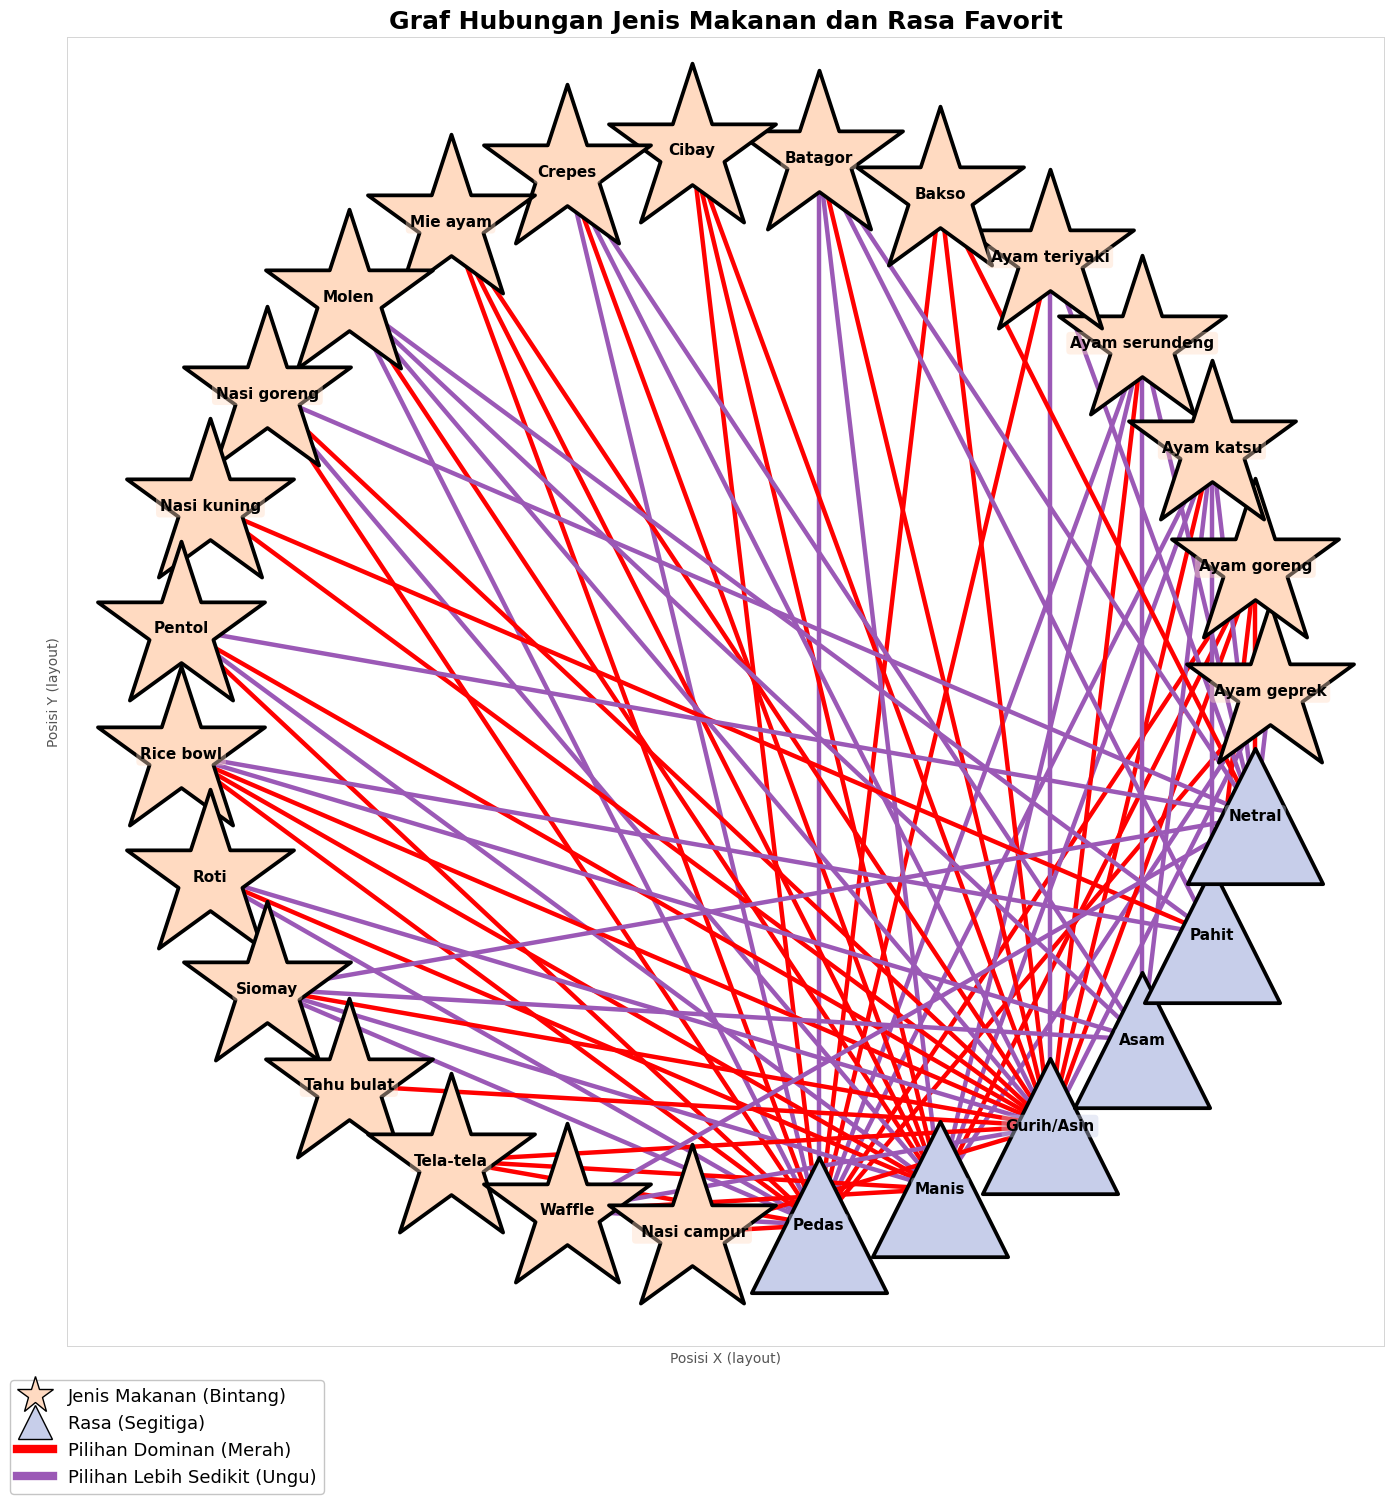

In [ ]:
df = pd.read_csv("Preferensi_Makanan_Kantin_UPN_clean.csv")
df.columns = [c.strip() for c in df.columns]

for col in df.columns:
    df[col] = df[col].astype(str).str.strip()

df["Jenis_Makanan"] = df["Jenis Makanan🍟"].where(
    df["Jenis Makanan🍟"].ne("nan") & (df["Jenis Makanan🍟"] != ""),
    df["Jenis Makanan 🍛"]
)

df["Rasa_Final_Raw"] = df["Rasa favorit kamu apa?.1"].where(
    df["Rasa favorit kamu apa?.1"].ne("nan") & (df["Rasa favorit kamu apa?.1"] != ""),
    df["Rasa favorit kamu apa?"]
)

kategori_rasa = {
    "Pedas": ["pedas"],
    "Manis": ["manis"],
    "Gurih/Asin": ["gurih", "asin"],
    "Asam": ["asam"],
    "Pahit": ["pahit"],
    "Netral": ["netral", "original"]
}

def kategori_rasa_final(text):
    t = text.lower()
    hasil = []
    for kategori, keywords in kategori_rasa.items():
        for k in keywords:
            if k in t:
                hasil.append(kategori)
                break
    return hasil if hasil else ["Netral"]

df["Rasa_Kategori"] = df["Rasa_Final_Raw"].apply(kategori_rasa_final)

freq = {}
for _, row in df.iterrows():
    jenis = row["Jenis_Makanan"]
    for rasa in row["Rasa_Kategori"]:
        freq[(jenis, rasa)] = freq.get((jenis, rasa), 0) + 1

max_rasa = {}
for jenis in df["Jenis_Makanan"].unique():
    counts = {rasa: freq.get((jenis, rasa), 0) for rasa in kategori_rasa.keys()}
    max_count = max(counts.values())
    max_rasa[jenis] = [r for r, v in counts.items() if v == max_count]

edges = []
for (jenis, rasa), count in freq.items():
    warna = "red" if rasa in max_rasa[jenis] else "#9B59B6"
    edges.append((jenis, rasa, warna))

jenis_list = sorted(df["Jenis_Makanan"].unique())
rasa_list = list(kategori_rasa.keys())

summary = df.explode("Rasa_Kategori").groupby(
    ["Jenis_Makanan", "Rasa_Kategori"]
).size().unstack(fill_value=0)

styled_table = (
    summary.style
    .set_properties(border="1px solid #999", padding="6px")
    .set_table_styles([
        {"selector": "th",
         "props": [("background-color", "#F7F1E3"),
                   ("color", "#2d2d2d"),
                   ("border", "1px solid #999"),
                   ("padding", "6px"),
                   ("font-weight", "bold")]}
    ])
    .set_caption("Tabel Frekuensi Hubungan Jenis Makanan dan Rasa")
)

display(styled_table)

G = nx.Graph()

G.add_nodes_from(jenis_list, shape="*", color="#FFDAC1")
G.add_nodes_from(rasa_list, shape="^", color="#C7CEEA")

for jenis, rasa, warna in edges:
    G.add_edge(jenis, rasa, color=warna)

angles = np.linspace(0, 2*np.pi, len(G.nodes), endpoint=False)
pos = {node: (np.cos(a), np.sin(a)) for node, a in zip(G.nodes, angles)}

plt.figure(figsize=(17,17))

for node in G.nodes:
    size = 16000 if node in jenis_list else 9500
    nx.draw_networkx_nodes(
        G, pos, nodelist=[node],
        node_color=G.nodes[node]["color"],
        node_shape=G.nodes[node]["shape"],
        node_size=size,
        edgecolors="black",
        linewidths=2.7
    )

edge_colors = [G[u][v]["color"] for u, v in G.edges()]
nx.draw_networkx_edges(
    G, pos,
    edge_color=edge_colors,
    width=3.2,
    connectionstyle="arc3, rad=0.22"
)

for node, (x, y) in pos.items():
    plt.text(
        x, y, node,
        fontsize=11,
        fontweight="bold",
        ha='center', va='center',
        bbox=dict(
            facecolor=G.nodes[node]["color"],
            edgecolor="none",
            boxstyle="round,pad=0.25",
            alpha=0.40
        )
    )

plt.axis("on")
ax = plt.gca()

for side in ["bottom", "left", "top", "right"]:
    ax.spines[side].set_color("#D5D5D5")
    ax.spines[side].set_linewidth(0.7)

plt.xlabel("Posisi X (layout)", fontsize=10, color="#555")
plt.ylabel("Posisi Y (layout)", fontsize=10, color="#555")
plt.xticks(fontsize=8, color="#777")
plt.yticks(fontsize=8, color="#777")

legend_elements = [
    Line2D([0], [0], marker='*', color='w',
           label='Jenis Makanan (Bintang)',
           markerfacecolor="#FFDAC1", markersize=28, markeredgecolor='black'),

    Line2D([0], [0], marker='^', color='w',
           label='Rasa (Segitiga)',
           markerfacecolor="#C7CEEA", markersize=24, markeredgecolor='black'),

    Line2D([0], [0], color='red', lw=6,
           label='Pilihan Dominan (Merah)'),

    Line2D([0], [0], color='#9B59B6', lw=6,
           label='Pilihan Lebih Sedikit (Ungu)')
]

plt.legend(
    handles=legend_elements,
    loc="lower left",
    bbox_to_anchor=(-0.05, -0.12),
    fontsize=13,
    frameon=True,
    facecolor="white",
    edgecolor="#BBBBBB",
    framealpha=0.85
)

plt.title("Graf Hubungan Jenis Makanan dan Rasa Favorit",
          fontsize=18, fontweight="bold")

plt.show()


Graf diatas menunjukkan hubungan antara jenis makanan yang dipilih mahasiswa dan rasa favorit berdasarkan data survei. Node berbentuk bintang mewakili berbagai jenis makanan seperti ayam geprek, molen, siomay, ayam katsu, dan lainnya, sedangkan node berbentuk segitiga mewakili enam rasa utama, yaitu Pedas, Manis, Gurih/Asin, Asam, Pahit, dan Netral.

Setiap garis menunjukkan bahwa suatu jenis makanan dipilih oleh mahasiswa yang menyukai rasa tersebut. Khusus untuk garis berwarna merah, ini menandakan rasa yang paling banyak dipilih untuk jenis makanan tersebut. Contohnya pada jenis makanan pentol, terdapat mahasiswa yang memilih rasa gurih/asin, manis, netral dan pedas, dan garis merah tertuju pada rasa gurih/asin dan pedas, jadi dari banyak nya mahasiswa yang membeli pentol sebagian besar mahasiswa suka rasa gurih/asin dan pedas daripada rasa manis dan netral.

**Graf Hubungan Jenis Makanan dan Rentang Harga**

Harga,> Rp 20.000,Rp 10.001 – Rp 15.000,Rp 15.001 – Rp 20.000,Rp 5.000 – Rp 10.000
Jenis_Makanan,,,,
Ayam geprek,0,6,1,0
Ayam goreng,0,2,1,0
Ayam katsu,0,5,7,0
Ayam serundeng,0,3,4,0
Ayam teriyaki,0,2,1,0
Bakso,0,0,2,0
Batagor,1,0,0,4
Cibay,0,1,0,0
Crepes,0,2,0,2


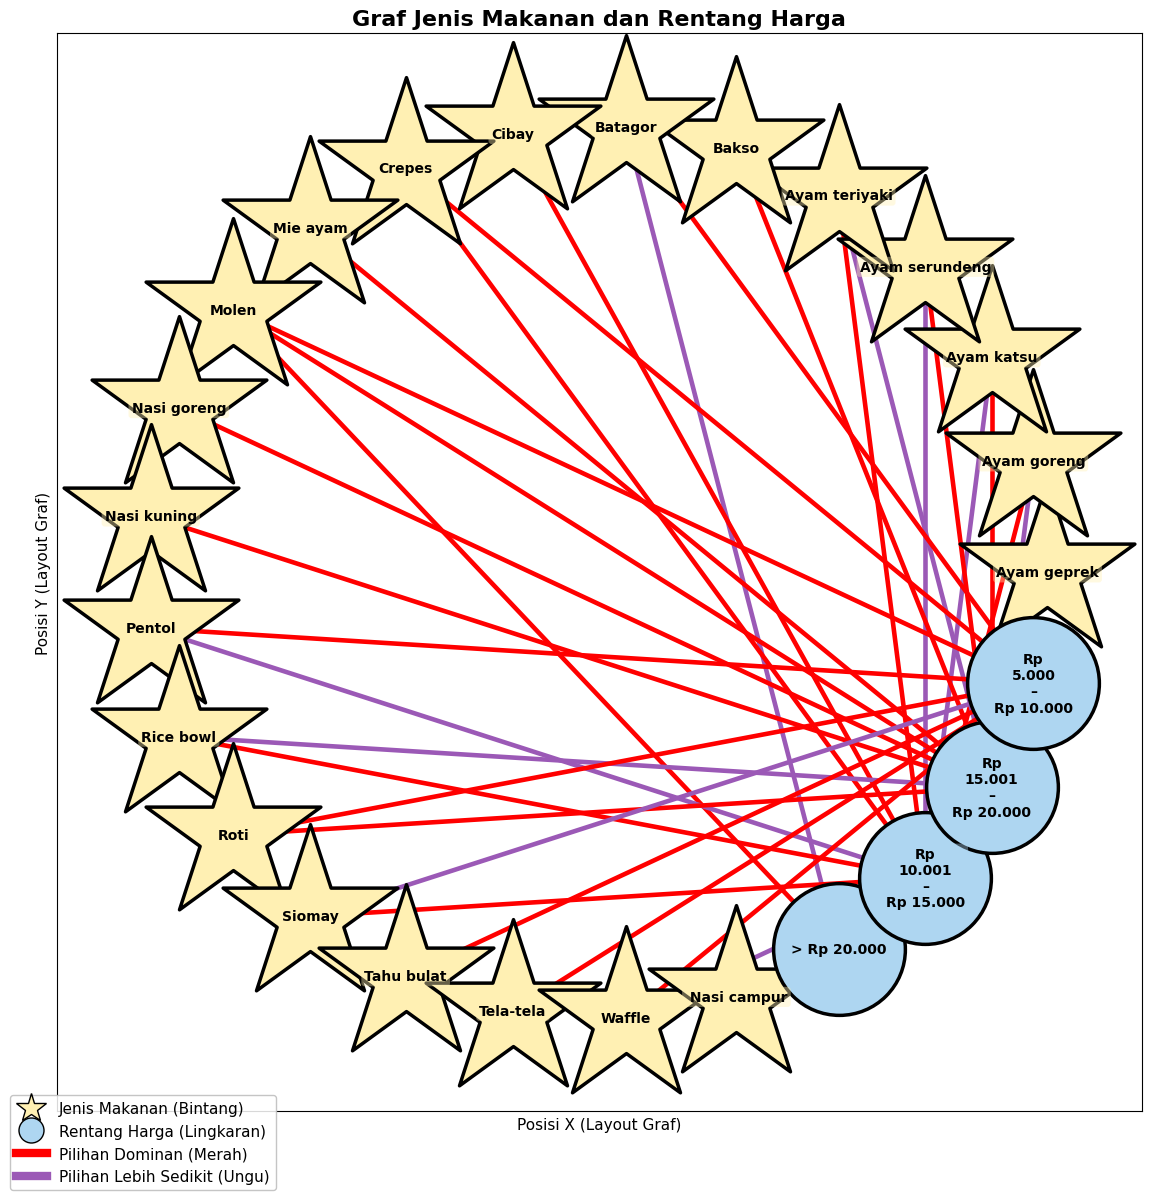

In [ ]:
df = pd.read_csv("Preferensi_Makanan_Kantin_UPN_clean.csv")
df.columns = [c.strip() for c in df.columns]

for col in df.columns:
    df[col] = df[col].astype(str).str.strip()

df["Jenis_Makanan"] = df["Jenis Makanan🍟"].where(
    df["Jenis Makanan🍟"].ne("") & df["Jenis Makanan🍟"].ne("nan"),
    df["Jenis Makanan 🍛"]
)

df["Harga"] = df["Rentang harga makanan kamu berapa nih?"].astype(str).str.strip()

summary = df.groupby(["Jenis_Makanan", "Harga"]).size().unstack(fill_value=0)

styled_table = (
    summary
    .style
    .set_properties(**{
        'border': '1px solid #999',
        'padding': '6px',
        'text-align': 'center'
    })
    .set_table_styles([
        {'selector': 'th',
         'props': [('background-color', '#FFE4C4'),
                   ('color', 'black'),
                   ('border', '1px solid #999'),
                   ('padding', '6px'),
                   ('font-weight', 'bold'),
                   ('text-align', 'center')]},
        {'selector': 'caption',
         'props': [('caption-side', 'top'),
                   ('font-size', '16px'),
                   ('font-weight', 'bold')]}
    ])
    .set_caption("Tabel Preferensi Rentang Harga Berdasarkan Jenis Makanan")
)

display(styled_table)

freq = df.groupby(["Jenis_Makanan", "Harga"]).size().to_dict()

max_harga = {}
for jenis in df["Jenis_Makanan"].unique():
    values = {h: freq.get((jenis, h), 0) for h in df["Harga"].unique()}
    max_count = max(values.values())
    max_harga[jenis] = [h for h, v in values.items() if v == max_count]

jenis_list = sorted(df["Jenis_Makanan"].unique())
harga_list = sorted(df["Harga"].unique())

all_nodes = jenis_list + harga_list

G = nx.Graph()
G.add_nodes_from(jenis_list, shape="*", color="#FFF0B3")
G.add_nodes_from(harga_list, shape="o", color="#AED6F1")

edges = []
for (jenis, harga), count in freq.items():
    warna = "red" if harga in max_harga[jenis] else "#9B59B6"
    edges.append((jenis, harga, warna))
    G.add_edge(jenis, harga, color=warna)

pos = {}
angle = np.linspace(0, 2*np.pi, len(all_nodes), endpoint=False)
R = 3.2

for node, a in zip(all_nodes, angle):
    pos[node] = (R * np.cos(a), R * np.sin(a))

plt.figure(figsize=(14,14))

for node in G.nodes:
    size = 17500 if node in jenis_list else 9000
    nx.draw_networkx_nodes(
        G, pos, nodelist=[node],
        node_color=G.nodes[node]["color"],
        node_shape=G.nodes[node]["shape"],
        node_size=size,
        edgecolors="black",
        linewidths=2.5
    )

edge_colors = [G[u][v]["color"] for u,v in G.edges()]
nx.draw_networkx_edges(
    G, pos,
    edge_color=edge_colors,
    width=3.3
)

for node,(x,y) in pos.items():
    label = node.replace(" ", "\n", 3) if len(node)>14 else node
    plt.text(
        x, y, label,
        fontsize=10,
        fontweight="bold",
        ha='center', va='center',
        bbox=dict(
            facecolor=G.nodes[node]["color"],
            edgecolor='none',
            boxstyle="round,pad=0.22",
            alpha=0.40
        )
    )

plt.axis("on")
ax = plt.gca()
plt.xlabel("Posisi X (Layout Graf)", fontsize=11)
plt.ylabel("Posisi Y (Layout Graf)", fontsize=11)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

legend_elements = [
    Line2D([0], [0], marker='*', color='w',
           label='Jenis Makanan (Bintang)',
           markerfacecolor="#FFF0B3", markersize=22, markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='w',
           label='Rentang Harga (Lingkaran)',
           markerfacecolor="#AED6F1", markersize=18, markeredgecolor='black'),
    Line2D([0], [0], color='red', lw=6,
           label='Pilihan Dominan (Merah)'),
    Line2D([0], [0], color='#9B59B6', lw=6,
           label='Pilihan Lebih Sedikit (Ungu)')
]

plt.legend(
    handles=legend_elements,
    loc="lower left",
    bbox_to_anchor=(-0.05, -0.08),
    fontsize=11,
    frameon=True,
    facecolor="white",
    edgecolor="#BBBBBB",
    framealpha=0.85
)

plt.title("Graf Jenis Makanan dan Rentang Harga",
          fontsize=16, fontweight='bold')

plt.show()


Graf diatas menunjukkan hubungan antara jenis makanan yang dipilih mahasiswa dan rentang harga berdasarkan data survei. Node berbentuk bintang mewakili berbagai jenis makanan seperti ayam geprek, molen, siomay, ayam katsu, dan lainnya, sedangkan node berbentuk lingkaran mewakili empat rentang harga, yaitu Rp 5.000- Rp 10.000, Rp 15.001- Rp 20.000, Rp 10.001- Rp 15.000, dan > Rp 20.000.

Setiap garis penghubung menunjukkan pilihan harga yang pernah dipilih mahasiswa untuk makanan tersebut. Khusus untuk garis berwarna merah, garis ini menunjukkan rentang harga yang paling sering dipilih untuk jenis makanan tertentu. Misalnya pada jenis makanan crepes, terdapat pembelian pada rentang Rp 5.000–10.000 dan Rp 10.000–15.000, serta kedua nya adalah garis merah. Sehingga dapat disimpulkan bahwa ....